# Statistics

In this chapter we focus on fundamental statistical applications using Python and in particular the stats module in SciPy. Here we discuss computing descriptive statistics, random numbers, random variables, distributions, and hypothesis testing. We defer
more involved statistical modeling and machine-learning applications to the following chapters. Some fundamental statistical functions are also available through the NumPy library, such as its functions and methods for computing descriptive statistics and its
module for generating random numbers. The SciPy stats module builds on top of NumPy and, for example, provides random number generators with more specialized
distributions.

Importing Modules

In [3]:
from scipy import stats
from scipy import optimize
import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

##Review of Statistics and Probability

We begin with a brief review of statistics, in order to introduce some of the key concepts
and the notation that we use in this and the following chapters. Statistics deals
with the collection and analysis of data for the purpose of gaining insights, drawing
conclusions, and supporting decision-making. 

Statistical methods are necessary when
we have incomplete information about a phenomenon. Typically we have incomplete
information because we are unable to collect data from all members of a population
or if there is uncertainty in observations that we make (e.g., due to measurement
noise). When we are unable to survey an entire population, a randomly chosen sample
can be studied instead, and we can use statistical methods and compute descriptive
statistics (parameters such as the mean and the variances) to make inferences about the
properties of the entire population (also called sample space) in a systematic manner
and with controlled risks of error.
Statistical methods are built on the foundation provided by probability theory,
with which we can model uncertainty and incomplete information using probabilistic,
random variables. For example, with randomly selected samples of a population, we can
hope to obtain representative samples whose properties can be used to infer properties
of the entire population. In probability theory, each possible outcome for an observation is given a probability, and the probability for all possible outcomes constitutes the
probability distribution. Given the probability distribution, we can compute the
properties of the population, such as its mean and variance, but for randomly selected
samples, we only know the expected, or average, results.

In statistical analysis it is important to distinguish between population and sample statistics. Here we denote parameters of the population with Greek symbols and parameters of a sample with the corresponding population symbol with the added subscript $x$ (or the symbol that is used to represent the sample). For example, the mean and the variance of a population are denoted with $\mu$  and $\sigma$, and the mean and the
variance of a sample $x$ are denoted as $μ_x$ and $\sigma^2_x$. Furthermore, we denote variables
representing a population (random variables) with capital letters, for example, $X$, and
a set of sample elements is denoted with a lowercase letter, for example, $x$.

For example, to compute the mean and the median of a dataset, we can use the NumPy functions mean and median:

In [ ]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [ ]:
np.median(x)

3.0

In [ ]:
x.min(), x.max()

(0.9, 6.7)

To compute the variance and the standard deviation for a dataset, we use the ``var`` and ``std`` methods. By default the formula for the population variance and standard deviation is used (i.e., it is assumed that the dataset is the entire population).

In [ ]:
x.var()

3.0700000000000007

In [ ]:
x.std()

1.7521415467935233

However, to change this behavior, we can use the argument ``ddof`` (delta degrees of freedom). The denominator in the expression for the variance is the number of elements in the array minus ddof, so to calculate the unbiased estimate of the variance and
standard deviation from a sample, we need to set ``ddof=1``:

In [ ]:
x.var(ddof=1)

3.5085714285714293

In [ ]:
x.std(ddof=1)

1.8731181032095732

## Random numbers

The Python standard library contains the module ``random``, which provides functions for
generating single random numbers with a few basic distributions. The ``random`` module in the NumPy module provides similar functionality but offers functions that generate NumPy arrays with random numbers, and it has support for a wider selection of probability distributions. Arrays with random numbers are often practical for computational purposes,
so here we focus on the random module in NumPy, and later also the higher-level functions and classes in scipy.stats, which build on top of and extend NumPy.

For example, the ``randn`` function produces
random numbers that are distributed according to the standard normal distribution (the normal distribution with mean 0 and standard deviation 1), and the ``randint`` function generates uniformly distributed integers between a given low (inclusive) and high (exclusive) value. When the ``rand`` and ``randn`` functions are called without any arguments, they produce a single random number:

In [ ]:
np.random.rand()

0.9307408360650457

In [ ]:
np.random.randn()

-1.3388637504169978

However, passing the shape of the array as arguments to these functions produces arrays of random numbers. For example, here we generate a vector of length 5 using
``rand`` by passing a single argument 5 and a 2 × 4 array using randn by passing 2 and 4 as arguments (higher-dimensional arrays are generated by passing the length of each dimension as arguments):

In [ ]:
np.random.rand(5)

array([0.68728287, 0.81640491, 0.82031672, 0.38094189, 0.54287834])

In [ ]:
np.random.randn(2, 4)

array([[-1.35661483, -2.14347075, -1.35234515, -0.98208747],
       [ 0.19949835,  1.03180591, -0.40391362, -0.37219994]])

To generate random integers using ``randint`` (see also random_integers), we need to either provide the upper limit for the random numbers (in which case the lower limit is implicitly zero) or provide both the lower and upper limits. The size of the generated array is specified using the size keyword arguments, and it can be an integer or a tuple that specifies the shape of a multidimensional array:

In [ ]:
np.random.randint(10, size=10)

array([6, 2, 0, 3, 6, 6, 6, 6, 2, 3])

In [ ]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[16, 18, 18, 14, 14, 15, 17, 10, 12, 14],
       [17, 10, 19, 19, 12, 15, 18, 14, 16, 15]])

Note that the randint function generates random integers in the half-open interval [low, high). To demonstrate that the random numbers produced by ``rand``, ``randn``, and ``randint``, indeed, are distributed differently, we can plot the histograms of say 10000 random numbers produced by each function. The result is shown in the next figure 13-1. We note that the distributions for ``rand`` and ``randint`` appear uniform but have different ranges and types, while the distribution of the numbers produced by ``randn`` resembles a Gaussian curve centered at zero, as expected.

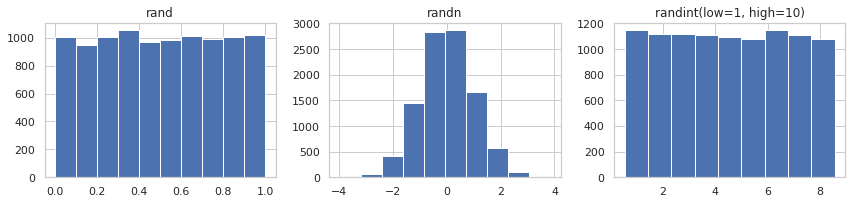

In [ ]:
fig, axes = plt.subplots(1,
                         3,
                         figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
#fig.savefig("ch13-random-hist.pdf")

In statistical analysis, it is often necessary to generate a unique list of integers. This corresponds to sampling (randomly selecting) items from a set (population) without replacement (so that we do not get the same item twice). From the NumPy random module, we can use the choice function to generate this type of random numbers. As the first argument, we can either provide a list (or array) with the values in the population or an integer that corresponds to the number of elements in the population. As the second argument, we give the number of values that are to be sampled. Whether the values are to be sampled with or without replacement can be specified using the replace keyword
argument, which takes the Boolean values True or False. For example, to sample five unique (without replacement) items from the set of integers between 0 (inclusive) and 10 (exclusive), we can use

In [ ]:
np.random.choice(10, 5, replace=False)

array([8, 0, 7, 5, 2])

When working with random number generation, it can be useful to seed the random number generator. The seed is a number that initializes random number generator
to a specific state, so that once it has been seeded with a specific number, it always generates the same sequence of random numbers. This can be useful when testing and for reproducing previous results and occasionally in applications that require reseeding
the random number generator (e.g., after having forked a process). To seed the random number generator in NumPy, we can use the seed function, which takes an integer as argument:

In [ ]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

The seed of the random number generator is a global state of the ``np.random`` module. A finer level of control of the state of the random number generator can be achieved by using the ``RandomState class``, which optionally takes a seed integer as argument to
its initializer. The ``RandomState`` object keeps tracks of the state of the random number
generator and allows maintaining several independent random number generators in the same program (which can be useful, e.g., when working with threaded applications). Once a ``RandomState`` object has been created, we can use methods of this object to
generate random numbers. The RandomState class has methods that correspond to the functions that are available in ``np.random module``. For example, we can use the method ``randn`` of the RandomState class to generate standard normal distributed random numbers:

In [ ]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

Similarly, there are methods, ``rand``, ``randint``, ``rand_integers``, and ``choice``, which
also correspond to the functions in the ``np.random`` module with the same name. It is considered good programming practice to use a RandomState instance rather thandirectly using the functions in the np.random module, because it avoids relying on
a global state variable and improves the isolation of the code. This is an important consideration when developing library functions that use random numbers, but is perhaps less important in smaller applications and calculations.

In addition to the fundamental random number distributions we have looked at so far (discrete and continuous uniform distributions, randint and rand, and the standard normal distribution, randn), there are also functions, and RandomState methods, for a large number of probability distributions that occur in statistics. To mention just a few, there is the continuous $\chi^2$ distribution (chisquare), the Student’s t distribution $t$, and the F distribution $f$:

In [ ]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [ ]:
prng.standard_t(1, size=(2, 3))

array([[ 1.15544019, -0.65730814, -0.55125015],
       [ 0.13578694, -3.34461641,  1.55560171]])

In [ ]:
prng.f(5, 2, size=(2, 4))

array([[ 1.48620557,  2.55433261,  1.21823269,  3.47619315],
       [ 0.50835525,  0.70599655, 12.08835081, 12.77671082]])

and the discrete binomial distribution (binomial) and the Poisson distribution (poisson):

In [ ]:
prng.binomial(10, 0.5, size=10)

array([5, 3, 4, 4, 8, 4, 4, 4, 4, 6])

In [ ]:
prng.poisson(5, size=10)

array([5, 4, 9, 7, 3, 6, 5, 5, 0, 6])

For a complete list of available distribution functions, see the docstrings for the ``np.
random`` module, ``help(np.random)``, and the ``RandomState class``. While it is possible to use
the functions in ``np.random`` and methods in RandomState to draw random numbers from many different statistical distribution functions, when working with distributions there is a higher-level interface in the scipy.stats module that combines random number
sampling with many other convenient functions for probability distributions. In the following section, we explore this in more detail.

## Random Variables and Distributions

In probability theory, the set of possible outcomes of a random process is called the **sample space**. Each element in the sample space (i.e., an outcome of an experiment or an observation) can be assigned a **probability**, and the probabilities of all possible
outcomes define the **probability distribution**. A **random variable** is a mapping from the sample space to the real numbers or to integers. For example, the possible outcomes of a coin toss are head and tail, so the sample space is {head, tail}, and a possible random
variable takes the value 0 for head and 1 for tail. In general there are many ways to
define random variables for the possible outcomes of a given random process. Random
variables are a problem-independent representation of a random process. It is easier to work with random variables because they are described by numbers instead of outcomes from problem-specific sample spaces. A common step in statistical problem-solving is therefore to map outcomes to numerical values and figure out the probability distribution of those values.

Consequently, a random variable is characterized by its possible values and its probability distribution, which assigns a probability for each possible value. Each
observation of the random variable results in a random number, and the distribution of the observed values are described by the probability distribution. **There are two main types of distributions, discrete and continuous distributions, which are integer valued and real valued, respectively**. When working with statistics, dealing with random variables is of central importance, and in practice this often means working with probability distributions. The SciPy stats module provides classes for representing random variables with a large number of probability distributions. There are two base classes for discrete and continuous random variables: ``rv_discrete`` and ``rv_continuous``.
These classes are not used directly, but rather used as base classes for random variables with specific distributions, and define a common interface for all random variable classes in SciPy stats. A summary of selected methods for discrete and continuous
random variables is given in the table below.

| Methods   | Description  |
|---|---|
| pdf/pmf | Probability distribution function (continuous) or probability mass function (discrete).  |
| cdf  | Cumulative distribution function.   |
| sf   | Survival function (1 – cdf).  |
| ppf  | Percent-point function (inverse of cdf).   |
| moment | Noncentral moments of nth order.  |
| stats  | Statistics of the distribution (typically the mean and variance, sometimes additional statistics)|
| fit  | Fit distribution to data using a numerical maximum likelihood optimization (for continuous distributions).  |
| expect  | Expectation value of a function with respect to the distribution.  |
| interval  | The endpoints of the interval that contains a given percentage of the distribution (confidence interval).  |
| rvs   | Random variable samples. Takes as argument the size of the resulting array of samples.  |
| mean, median, std, var | Descriptive statistics: mean, median, standard deviation, and the variance of the distribution.   |

There are a large number of classes for the discrete and continuous random variable in the SciPy stats module. At the time of writing, there are classes for 13 discrete and 98 continuous distributions, and these include the most commonly encountered distributions (and many less common). For a complete reference, see the docstring for the stats module: ``help(stats)``. In the following we explore some of the more common
distributions, but the usage of all the other distributions follows the same pattern.

The random variable classes in the SciPy stats module have several use-cases. They are both representations of the distribution, which can be used to compute descriptive statistics and for graphing, and they can be used to generate random numbers following the given distribution using the rvs (random variable sample) method. The latter use-case is similar to what we used the np.random module for earlier in this topic.

As a demonstration of how to use the random variable classes in SciPy stats, consider the following example where we create a normal distributed random variable
with mean 1.0 and standard deviation 0.5:

In [ ]:
X = stats.norm(1, 0.5)

Now X is an object that represents a random variable, and we can compute descriptive statistics of this random variable using, for example, the mean, median, std, and var methods:

In [ ]:
X.mean()

1.0

In [ ]:
X.median()

1.0

In [ ]:
X.std()

0.5

In [ ]:
X.var()

0.25

[Noncentral moments](https://www.google.com/search?q=non+central+moments&oq=noncentral+mome&aqs=chrome.1.69i57j0i19l5j0i10i19i22i30j0i5i13i19i30.4278j0j7&sourceid=chrome&ie=UTF-8) of arbitrary order can be computed with the moment method:

In [ ]:
[X.moment(n) for n in range(10)]

[1.0,
 1.0,
 1.25,
 1.75,
 2.6875,
 4.437499999985435,
 7.796874999989943,
 14.453125000060153,
 28.09765624998442,
 57.00390624794033]

And we can obtain a distribution-dependent list of statistics using the stats method(here, for a normal distributed random variable, we get the mean and the variance):

In [ ]:
X.stats()

(array(1.), array(0.25))

We can evaluate the probability distribution function, the cumulative distribution function, the survival function, etc., using the methods ``pdf``, ``cdf``, ``sf``, etc. These all take a value, or an array of values, at which to evaluate the function:

In [ ]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [ ]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

The interval method can be used to compute the lower and upper values of x such that a given percentage of the probability distribution falls within the interval
(lower, upper). This method is useful for computing confidence intervals and for selecting a range of x values for plotting:

In [ ]:
X.interval(0.95)
#95% of the values are between 0.020018007729972975 and 1.979981992270027

(0.020018007729972975, 1.979981992270027)

In [ ]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

Certainly when you call this method with 1, you will get an interval bound between $-\infty$ and $\infty$.

**Task**: Try calling the method with a value of $0$ and explain the results. 

In [ ]:
X.interval(1)

(-inf, inf)

To build intuition for the properties of a probability distribution, it is useful to graph it, together with the corresponding cumulative probability function and the percent-point function. To make it easier to repeat this for several distributions, we first create a 
function ``plot_rv_distribution`` that plots the result of pdf or pmf, the cdf and sf, and ppf methods of the SciPy stats random variable objects, over an interval that contains 99.9% of the probability distribution function. We also highlight the area that contains
95% of the probability distribution using the fill_between drawing method:

In [ ]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

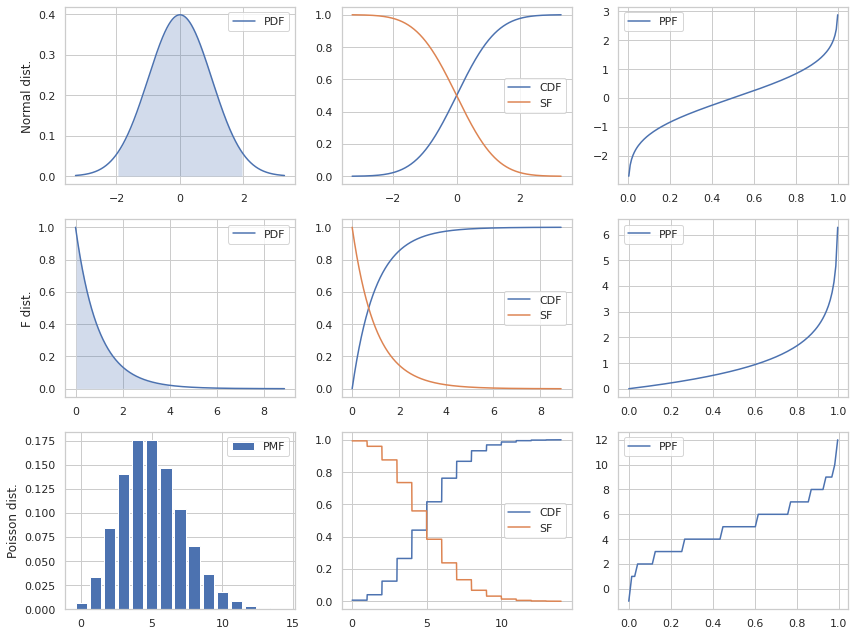

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
#fig.savefig("ch13-distributions.pdf")
# generates examples of probability distribution functions (PDF) or probability mass functions (PMFs),
# cumulative distribution functions (CDF), survival functions (SF), 
# and percent-point functions (PPF) for a normal distribution (top), an F distribution (middle),
# and a Poisson distribution (bottom)

In the examples so far, we have initiated an instance of a random variable class and computed statistics and other properties using method calls. An alternative way
to use the random variable classes in SciPy’s stats module is to use class methods, for example, ``stats.norm.mean``, and pass the distribution parameters as arguments (often loc and scale, as in this example for normally distributed values):

In [ ]:
stats.norm.stats(loc=2, 
                 scale=0.5)

(array(2.), array(0.25))

which gives the same result as first creating an instance and then calling the corresponding method:

In [ ]:
stats.norm(loc=1,
           scale=0.5).stats()

(array(1.), array(0.25))

Most methods in the ``rv_discrete`` and ``rv_continuous`` classes can be used as class
methods in this way. 

So far we have only looked at properties of the distribution function of random variables. Note that although a distribution function describes a random variable, the distribution itself is fully deterministic. To draw random numbers that are distributed according to the given probability distribution, we can use the rvs (random variable
sample) method. It takes as argument the shape of the required array (can be an integer for a vector or a tuple of dimension lengths for a higher-dimensional array). Here we use rvs(10) to generate a one-dimensional array with ten values:

In [ ]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

To see that the resulting random numbers indeed are distributed according to the corresponding probability distribution function, we can graph a histogram of a large number of samples of a random variable and compare it to the probability distribution
function. Again, to be able to do this easily for samples of several random variables, we
create a function plot_dist_samples for this purpose. This function uses the interval method to obtain a suitable plot range for a given random variable object.

In [ ]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

Note that in this function we have used the tuple unpacking syntax ``*x_lim``, which distributes the elements in the tuple x_lim to different arguments for the function. In this case it is equivalent to ``np.linspace(x_lim[0], x_lim[1], num=100)``.
Next we use this function to visualize 2000 samples of three random variables with different distributions: here we use the Student’s t distribution, the $\chi^2$ distribution,
and the exponential distribution, and the results are shown in the next figure. Since 2000 is a fairly large sample, the histogram graphs of the samples coincide well with the probability distribution function. With an even larger number of samples, the agreement
can be expected to be even better.

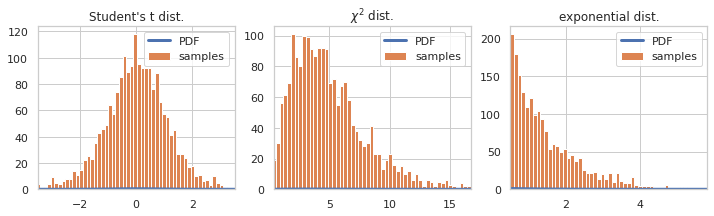

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000

# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])

# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])

# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

The opposite of drawing random samples from a known distribution function is to fit given probability distribution with unknown parameters to a set of data points. In such a fit, we typically wish to optimize the unknown parameters such that the likelihood of
observing the given data is maximized. This is called a maximum likelihood fit. Many of the random variable classes in the SciPy stats module implements the method fit that performs such a fitting to given data. As a first example, consider drawing 500 random samples from the $\chi^2$ distribution with five degrees of freedom (df=5) and then refitting the random variables to the $\chi^2$ distribution using the fit method.

In [ ]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.967613457653257, -0.01152415918780448, 0.979181624921978)

In [ ]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

The fit method returns the maximum likelihood parameters of the distribution, for the given data. We can pass on those parameters to the initializer of the ``stats.chi2`` to create a new random variable instance Y. The probability distribution of Y should
resemble the probability distribution of the original random variable X. To verify this we can plot the probability distribution functions for both random variables. The resulting graph is shown in the next figure.

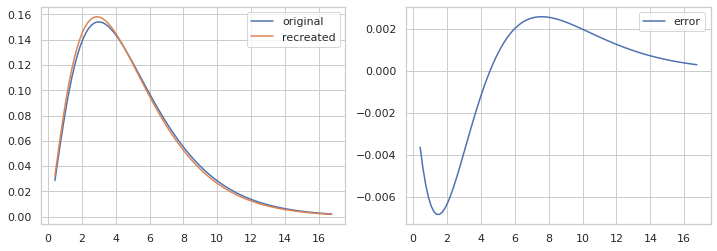

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()
# generates original and recreated probability distribution function (left) and
# the error (right), from a maximum likelihood fit of 500 random samples of the
# original distribution

## Hypothesis testing

Hypothesis testing is a cornerstone of the scientific method, which requires that claims are investigated objectively and that a claim is rejected or accepted on the basis of factual observations. Statistical hypothesis testing has a more specific meaning. It is a systematic methodology for evaluating if a claim, or a hypothesis, is reasonable or not, on the basis of data. As such it is an important application of statistics. In this methodology, we formulate the hypothesis in terms of a null hypothesis, $H_0$, which represents the currently accepted state of knowledge, and an alternative hypothesis, $H_A$, which represents a
new claim that challenges the current state of knowledge. The null hypothesis and the alternative hypothesis must be mutually exclusive and complementary, so that one and only one of the hypotheses is true.

Once $H_0$ and $H_A$ are defined, the data that support the test must be collected, for example, through measurements, observations, or a survey. The next step is to find a test statistics that can be computed from the data and whose probability distribution function can be found under the null hypothesis. Next we can evaluate the data by computing the probability (the p-value) of obtaining the observed value of the test
statistics (or a more extreme one) using the  distribution function that is implied by the
null hypothesis. If the p-value is smaller than a predetermined threshold, known as the significance level, and denoted by α (typically 5% or 1%), we can conclude that the observed data is unlikely to have been described by the distribution corresponding to
the null hypothesis. In that case, we can therefore reject the null hypothesis in favor of
the alternative hypothesis. The steps for carrying out a hypothesis test are summarized in the following list:

1. Formulate the null hypothesis and the alternative hypothesis.
2. Select a test statistics such that its sampling distribution under the null hypothesis is known (exactly or approximately).
3. Collect data.
4. Compute the test statistics from the data and calculate its $p$-value under the null hypothesis.
5. If the $p$-value is smaller than the predetermined significance level $\alpha$, we reject the null hypothesis. If the $p$-value is larger, we fail to
reject the null hypothesis.

Statistical hypothesis testing is a probabilistic method, which means that we cannot be certain in the decision to reject or not to reject the null hypothesis. There can be two types of error: we can mistakenly reject the null hypothesis when in reality
it should not be rejected, and we can fail to reject the null hypothesis when it should be rejected. These are called type I and type II errors, respectively. By choosing the required significance level, we can balance the trade-off between these two types of error.

In general, the most challenging step in the method outlined in the preceding section is to know the sampling distribution of the test statistics. Fortunately many hypothesis tests fall in a few standard categories for which the probability distributions are known. A brief summary and overview of common hypothesis test cases and the corresponding distribution of their test statistics are given in the following table. For motivations for why each of these tests is suitable for stated situations, and the full set of conditions for the validity of the tests, see statistics textbooks such as Wasserman (2004) or Rice
(1995). The docstring for each listed functions in the SciPy stats module also contains further information about each test.

| Null Hypothesis | Distributions | SciPy Functions for Test |
|---|---|---|
| Test if the mean of a population is a given value.| Normal distribution (``stats.norm``), or Student’s t distribution (``stats.t``) |``stats.ttest_1samp``   |
| Test if the means of two random variables are equal (independent or paired samples).  | Student’s t distribution (``stats.t``)  | ``stats.ttest_ind``, ``stats.ttest_rel``  |
| Test goodness of fit of a continuous distribution to data.  | Kolmogorov-Smirnov distribution  | ``stats.kstest``  |
| Test if categorical data occur with given frequency (sum of squared normally distributed variables) | $\chi^2$ distribution (``stats.chi2``)  | ``stats.chisquare``  |
| Test for the independence of categorical variables in a contingency table.  | $\chi^2$ distribution  | ``stats.chi2_contingency``  |
| Test for equal variance in samples of two or more variables.  | $F$ distribution(``stats.f``)  | ``stats.barlett``,``stats.levene`` |
| Test for noncorrelation between two variables.  | Beta distribution (``stats.beta,stasts.mstats.betai``)  | ``stats.pearsonr``,``stats.spearmanr``  |
| Test if two or more variables have the same population mean (ANOVA – analysis of variance).  | $F$ distribution  | ``stats.f_oneway``,
``stats.kruskal``  |

In the following we also look at examples of how the corresponding functions in`SciPy stats module can be used to carry out steps 4 and 5 in the preceding procedure given: computing a test statistic and the corresponding p-value.

For example, a common null hypothesis is a claim that the mean $\mu$ of a population
is a certain value $\mu_0$. We can then sample the population and use the sample mean $x$
to form a test statistic $ z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$
, where $n$ is the sample size. If the population is large and the variance $\sigma$ is known, then it is reasonable to assume that the test statistic is normally distributed. If the variance is unknown, we can substitute $\sigma^2$ with the sample variance $\sigma^2_x$. The test statistic then follows the Student’s t distribution, which in the limit
of a large number of samples approaches the normal distribution. Regardless of which
distribution we end up using, we can compute a p-value for the test statistics using the
given distribution.

As an example of how this type of hypothesis test can be carried out using the functions provided by the SciPy stats module, consider a null hypothesis that claims that a random variable $X$ has mean $\mu_0 = 1$. Given samples of $X$, we then wish to test if the
sampled data is compatible with the null hypothesis. Here we simulate the samples by
drawing 100 random samples from a distribution slightly different than that claimed by
the null hypothesis (using $\mu = 0.8$):

In [ ]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

Given the sample data, ``X_samples``, next we need to compute a test statistic. If the
population standard deviation $\sigma$ is known, as in this example, we can use $ z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$
,
which is normally distributed.

In [ ]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-5.190957645172878

If the population variance is not known, we can use the sample standard deviation
instead: $ t = \frac{\bar{x} - \mu}{\sigma_x / \sqrt{n}}$
. However, in this case, the test statistics t follows the Student’s t distribution instead rather than the normal distribution. To compute t in this case, we can use the NumPy method ``std`` with the ``ddof=1`` argument to compute the sample standard deviation:

In [ ]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-5.636588129144241

In either case we get a test statistics that we can compare with the corresponding distribution to obtain a p-value. For example, for a normal distribution, we can use a ``stats.norm`` instance to represent a normal distributed random variable, and with its ppf method, we can look up the statistics value that corresponds to a certain significance
level. For a two-sided hypothesis test of significance level 5% (2.5% on each side), the
statistics threshold is

In [ ]:
stats.norm().ppf(0.025)

-1.9599639845400545

Since the observed statistics is about -5.19, which is smaller than the threshold value –1.96 for a two-sided test with significance level 5%, we have sufficient grounds to reject the null hypothesis in this case. We can explicitly compute the p-value for the observed test statistics using the cdf method (multiplied by two for a two-sided test). The resulting p-value is indeed rather small, which supports the rejection of the null hypothesis:

In [ ]:
2 * stats.norm().cdf(-abs(z))

2.0921521832875364e-07

If we would like to use the t distribution, we can use the ``stats.t`` class instead of
``stats.norm``. After computing the sample mean, $\bar{x}$ , only n − 1 degrees of freedom (df) remains in the sample data. The number of degrees of freedom is an important parameter for the t distribution, which we need to specify when we create the random variable instance:

In [ ]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

1.638166894484826e-07

The p-value is again very small, suggesting that we should reject the null hypothesis.
Instead of explicitly carrying out these steps (computing the test statistics, then
computing the p-value), there are built-in functions in SciPy’s stats module for carrying
out many common tests, as summarized in the next table. For the test we have used here,
we can directly compute the test statistics and the p-value using the ``stats.ttest_1samp``
function:

In [ ]:
t, p = stats.ttest_1samp(X_samples, mu)
t, p

(-1.2931983236922484, 0.19895199146059042)

Again we see that the p-value is very small (the same value as in the preceding text)
and that we should reject the null hypothesis. It is also illustrative to plot the distribution
corresponding to the null hypothesis, together with the sampled data:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


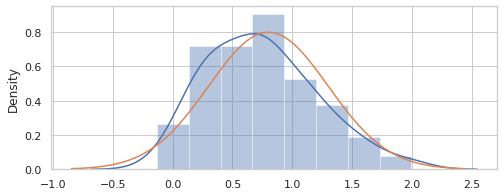

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))
# Distribution function according to the null hypothesis (light red)
# and the sample estimated distribution function (dark blue)

For another example, consider a two-variable problem, where the null hypothesis states that the population means of two random variables are equal (e.g., corresponding to independent subjects with and without treatment). We can simulate this type of test by creating two random variables with normal distribution, with a randomly chosen population means. Here we select 50 samples for each random variable.

In [ ]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

We are interested in evaluating if the observed samples provide sufficient evidence that the two population means are not equal (rejecting the null hypothesis). For this situation, we can use the $t$ test for two independent samples, which is available in SciPy
``stats.ttext_ind``, which returns the test statistics and the corresponding p-value:

In [ ]:
t, p = stats.ttest_ind(X1_sample, X2_sample)
t, p

(-0.21180194003615127, 0.8327014219397558)

Here the p-value is about 0.83, which is not small enough to support rejecting the
null hypothesis that the two means are different. In this example the two population
means are indeed different:

In [ ]:
mu1, mu2

(0.3119743535180922, 0.5149821324450357)

However, the particular samples drawn from these distributions did not statistically
prove that these means are different (an error of type II). To increase the power of the
statistical test, we would need to increase the number of samples from each random variable.

The SciPy stats module contains functions for common types of hypothesis testing
([see the summary in the table in the first cell](https://colab.research.google.com/drive/1o68IFTEQY_ZeTyZJokzD5yeTLhHkbZew?authuser=4#scrollTo=wxphCKNA_Acr)), and their use closely followed what we have seen in
the examples in this section. However, some tests require additional arguments for
distribution parameters. See the docstrings for each individual test function for details.

##  Nonparametric methods

So far we have described random variables with distributions that are completely determined by a few parameters, such as the mean and the variance for the normal distributions. Given the sampled data, we can fit a distribution function using maximum likelihood optimization with respect to the distribution parameters. Such distribution functions are called *parametric*, and statistical methods based on such distribution functions (e.g., a hypothesis test) are called parametric methods. When using those methods, we make a strong assumption that the sampled data is indeed described by
the given distribution. An alternative approach to constructing a representation of an unknown distribution function is kernel-density estimation (KDE), which can be viewed as a smoothened version of the histogram of the sampled data (see next figure). In this method, the probability distribution is estimated by a sum of the kernel function centered at each data point $\hat{f}(x)=\frac{1}{{n}\cdot{bw}} \sum_{i=0}^{n}K(\frac{x - x_i}{bw})$, where bw is a free parameter known as the *bandwidth* and $K$ is the kernel function (normalized so that it integrates to unity). The bandwidth is an important parameter that defines a scale for the influence of each term in the sum. A too broad bandwidth gives a featureless estimate of the probability distribution, and a too small bandwidth gives a noisy overly structured
estimate (see the middle panel in the next figure). Different choices of kernel functions are also possible. A Gaussian kernel is a popular choice, because of its smooth shape with
local support, and it is relatively easy to perform computations with.
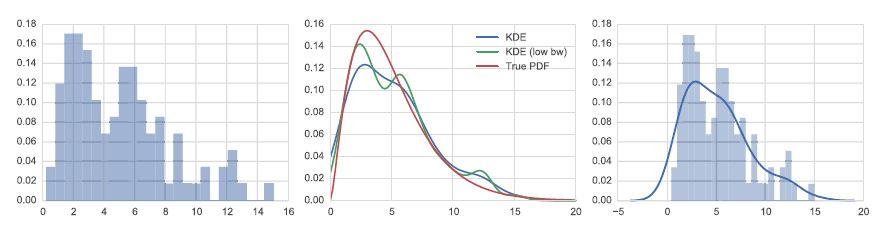
Histogram (left), kernel-density estimation of the distribution
function (middle), and both a histogram and the kernel-density estimate in the
same graph (right)

In SciPy’s the KDE method using a Gaussian kernel is implemented in the function ``stats.kde.gaussian_kde``. This function returns a callable object that behaves as, and can be used as, a probability distribution function. For example, consider a set of samples, ``X_samples``, drawn from a random variable ``X`` with unknown distribution (here
simulated using the $\chi^2$ distribution with five degrees of freedom):

In [ ]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

To compute the kernel-density estimate for the given data, we call the function ``stats.kde.guassian_kde`` with the array of sample points as argument:

In [ ]:
kde = stats.kde.gaussian_kde(X_samples)

By default, a standard method for computing a suitable bandwidth is used, which often gives acceptable results. However, if we wish, we could also specify a function for computing the bandwidth, or directly setting the bandwidth, using the ``bw_method`` argument. To set a smaller bandwidth, we can, for example, use

In [ ]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

The ``gaussian_kde`` function returns an estimate of the distribution function, which
we, for example, can graph or use for other applications. Here we plot a histogram of the
data and the two kernel-density estimates (with default and explicitly set bandwidth). For reference, we also plot the true probability distribution function for the samples. The
result is shown in the next figure.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


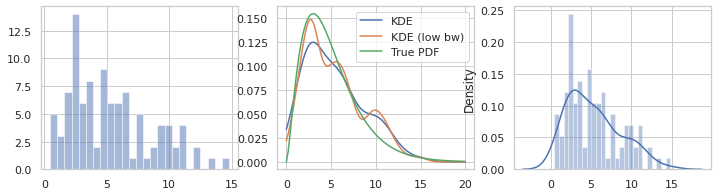

In [ ]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

The seaborn statistical graphics library provides a convenient function for plotting
both a histogram and the kernel-density estimation for a set of data: distplot. A graph
produced by this function is shown in the right panel of the figure above.

Given kernel-density estimate, we can also use it to generate new random numbers using the resample method, which takes the number of data points as arguments:

In [ ]:
kde.resample(10)

array([[ 3.6090197 , 11.87587733,  4.09872936,  3.93367256,  6.86332365,
         4.46691146,  5.23317677,  8.86557566, 12.1158836 ,  5.82811648]])

The kernel-density estimate object does not directly contain methods for computing the cumulative distribution functions (CDF) and its inverse, the percent-point function (PPF). But there are several methods for integrating the kernel-density estimate of the probability distribution function. For example, for a one-dimensional KDE, we can use the ``integrate_box_1d`` to obtain the corresponding CDF:

In [ ]:
def _kde_cdf(x):
  return kde.integrate_box_1d(-np.inf, x)

kde_cdf = np.vectorize(_kde_cdf)

and can use the SciPy ``optimize.fsolve`` function to find the inverse (the PPF):

In [ ]:
def _kde_ppf(q):
  return optimize.fsolve(lambda x, 
                         q: kde_cdf(x) - q, 
                         kde.dataset.mean(), 
                         args=(q,))[0]

kde_ppf = np.vectorize(_kde_ppf)

With the CDF and PPF for the kernel-density estimate, we can, for example, perform
statistical hypothesis testing and compute confidence intervals. For example, using the
``kde_ppf`` function defined in the preceding section, we can compute an approximate 90%
confidence interval for the mean of the population from which the sample was collected:

In [ ]:
kde_ppf([0.05, 0.95])

array([ 0.51910841, 11.78298469])

As illustrated with this example, once we have a KDE that represents the probability  distribution for a statistical problem, we can proceed with many of the same methods as
we use in parametric statistics. The advantage of nonparametric methods is that we do
not necessarily need to make assumptions about the shape of the distribution function.
However, because nonparametric methods use less information (weaker assumptions) than parametric methods, their statistical power is lower. Therefore, if we can justify using a parametric method, then that is usually the best approach. Nonparametric methods offer a versatile generic approach that we can fall back on when parametric methods are not feasible.

# Statistical modeling

Statistical modeling deals with creating models that attempt to explain data. A model can
have one or several parameters, and we can use a fitting procedure to find the values of the
parameter that best explains the observed data. Once a model has been fitted to data, it
can be used to predict the values of new observations, given the values of the independent variables of the model. We can also perform statistical analysis on the data and the fitted model and try to answer questions such as if the model accurately explains the data,which factors in the model are more relevant (predictive) than others, and if there are parameters that do not contribute significantly to the predictive power of the model.

In this chapter we mainly use the statsmodels library. It provides classes and
functions for defining statistical models and fitting them to observed data, for calculating
descriptive statistics, and for carrying out statistical tests. The statsmodels library has
some overlap with the SciPy stats module that we covered in the previous chapter, but
it is mostly an extension of what is available in SciPy1. In particular, the main focus of the
statsmodels library is on fitting models to data rather than probability distributions and
random variables, for which in many cases it relies on the SciPy stats.

The statsmodels library is closely integrated with the Patsy library, which allows us to
write statistical models as simple formulas. The Patsy library is one of the dependencies
of the statsmodels library but can also be used with other statistical libraries as well,
such as scikit-learn that will be discussed in Chapter 15. However, here we will introduce
the Patsy library in the context of using it together with the statsmodels library.

---
The statsmodels library provides a rich set of functionality related to statistical tests and statistical modeling, including linear regression, logistic regression, and time-series analysis. For more information about the project and its documentation, see the project’s web page at http://statsmodels.

---

The patsy library provides features for defining statistical models with a simple formula language inspired by statistical software such as R. The patsy library is designed to be a companion library for statistical modeling packages, such as statsmodels. For more information about the project and its documentation, see the web page at http://patsy.readthedocs.org.


Importing modules

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

# Since the statsmodels library internally uses the Patsy library, it is normally not
# necessary to access this library’s functions directly. However, here we directly use Patsy
# for demonstration purposes, and we therefore need to import the library explicitly:
import patsy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction to Statistical Modeling

In this chapter we consider the following type of problem: For a set of response
(dependent) variables $Y$ and explanatory (independent) variables $X$, we wish to find
a mathematical relationship (model) between $Y$ and $X$. In general, we can write a
mathematical model as a function $Y = f (X)$. Knowing the function $f (X)$ would allow us to
compute the value of $Y$ for any of values $X$. If we do not know the function $f (X)$, but we
have access to data for observations ${y_i, x_i}$, we can parameterize the function $f (X)$ and
fit the values of the parameters to the data. An example of a parameterization of $f (X)$ is
the linear model $f (X) = \beta_0 + \beta_1X$, where the coefficients $\beta_0$  and $\beta_0 $ are the parameters of the model. Typically we have many more data points than the number of free parameters in the model. In such cases we can, for example, use a least square fit that minimizes the norm of the residual $r = Y − f (X)$, although other minimization objective functions can also be used, for example, depending on the statistical properties of the residual $r$. So far we have described a mathematical model. The essential component that makes a model statistical is that the data ${y_i, x_i}$ has an element of uncertainty, for example, due to measurement noise or other uncontrolled circumstances. The uncertainty in the data can be described in the model as random variables: For example, $Y = f (X)+\varepsilon $, where $\varepsilon $ is a random variable. This is a statistical model because it includes random variables.
Depending on how the random variables appear in the model and what distributions the random variables follow, we obtain different types of statistical models, which each may require different approaches to analyze and solve.

A typical situation where a statistical model can be used is to describe the observations $y_i$ in an experiment, where $x_i$ is a vector with control knobs that are recorded together with each observation. An element in $x_i$ may or may not be relevant for predicting the observed outcome $y_i$, and an important aspect of statistical modeling is to determine which explanatory variables are relevant. It is of course also possible that there are relevant factors that are not included in the set of explanatory variables $xi$, but which influence the outcome of the observation $y_i$. In this case, it might not be possible to accurately explain the data with the model. Determining if a model accurately explains the data is another essential aspect of statistical modeling.

A widely used statistical model is $Y = \beta_0 + \beta_1X + \varepsilon$, where $\beta_0$ and $\beta_1$ are model parameters and $\varepsilon$ is normally distributed with zero mean and variance $\sigma^2: \varepsilon \sim  N(0, \sigma^2)$. This model is known as simple linear regression if $X$ is a scalar, multiple linear regression if $X$ is a vector, and multivariate linear regression if $Y$ is a vector. Because the residual $\varepsilon$ is normally distributed, for all these cases, the model can be fitted to data using ordinary least squares (OLS). Relaxing the condition that the elements in $Y$, in the case of
multivariate linear regression, must be independent and normally distributed with equal
variance gives rise to variations of the model that can be solved with methods known as
generalized least squares (GLS) and weighted least squares (WLS). All methods for solving
statistical models typically have a set of assumptions that one has to be mindful of when
applying the models. For standard linear regression, the most important assumption is
that the residuals are independent and normally distributed.

The generalized linear model is an extension of the linear regression model that allows the errors in the response variable to have distributions other than the normal distribution. In particular, the response variable is assumed to be a function of a
linear predictor and where the variance of the response variable can be a function of the variable’s value. This provides a broad generalization of the linear model that is
applicable in many situations. For example, this enables modeling important types of
problems where the response variable takes discrete values, such as binary outcomes of
count values. The errors in the response variables of such models may follow different
statistical distributions (e.g., the binomial and/or the Poisson distribution). Examples
of these types of models include logistic regression for binary outcomes and Poisson
regression for positive integer outcomes.

## Linear regression

The statsmodels library supports several types of statistical models that are applicable
in varying situations, but nearly all follow the same usage pattern, which makes it easy
to switch between different models. Statistical models in statsmodels are represented
by model classes. These can be initiated given the design matrices for the response and
explanatory variables of a linear model or given a Patsy formula and a data frame (or
another dictionary-like object). The basic workflow when setting up and analyzing a
statistical model with statsmodels includes the following steps:
1. Create an instance of a model class, for example, using ``model = sm.MODEL(y, X)`` or ``model = smf.model(formula, data)``, where
``MODEL`` and ``model`` are the name of a particular model, such as OLS, GLS, Logit, etc. Here the convention is that uppercase names
are used for classes that take design matrices as arguments and lowercase names for classes that take Patsy formulas and data frames as arguments.
2. Creating a model instance does not perform any computations. To fit the model to the data, we must invoke the fit method, ``result = model.fit()``, which performs the fit and returns a result object that has methods and attributes for further analysis.
3. Print summary statistics for the result object returned by the fit method. The result object varies in content slightly for each
statistical model, but most models implement the method ``summary``, which produces a summary text that describes the result
of the fit, including several types of statistics that can be useful for judging if the statistical model successfully explains the data. Viewing the output from the summary method is usually a good starting point when analyzing the result of a fitting process.
4. Post-process the model fit results: in addition to the summary method, the result object also contains methods and attributes
for obtaining the fitted parameters (``params``), the residual for the model and the data (``resid``), the fitted values (``fittedvalues``), and a
method for predicting the value of the response variables for new`independent variables (``predict``).
5. Finally, it may be useful to visualize the result of the fitting, for example, with the Matplotlib and Seaborn graphics libraries,
of using some of the many graphing routines that are directly included in the statsmodels library (see the ``statsmodels.graphics module``).

To demonstrate this workflow with a simple example, in the following we consider
fitting a model to generate data whose true value is $y = 1 + 2x_1 + 3x_2 + 4x_1x_2$. We begin with storing the data in a Pandas data frame object:

In [ ]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
  return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)

Here we have stored the true value of $y$ in the ``y_true`` column in the DataFrame object
data. We simulate a noisy observation of $y$ by adding a normal distributed noise to the true values and store the result in the $y$ column:

In [ ]:
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e

Now, from the data we know that we have two explanatory variables, $x1$ and $x2$, in
addition to the response variable $y$. The simplest possible model we can start with is the
linear model $Y = \beta_0 + \beta_1x1 + \beta_2x2$, which we can define with the Patsy formula ``y ~ x1 + x2``.
Since the response variable is continuous, it is a good starting point to fit the model to
the data using ordinary linear squares, for which we can use the ``smf.ols`` class.

In [ ]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

Remember that ordinary least square regression assumes that the residuals of the fitted model and the data are normally distributed. However, before analyzing the data, we might not know if this condition is satisfied or not. Nonetheless, we can start by fitting the data to the model and investigate the distribution of the residual using graphical methods and statistical tests (with the null hypothesis that the residuals are indeed normally distributed). A lot of useful information, including several types of test statistics, can be displayed using the summary method:

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     50.62
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           8.80e-16
Time:                        14:51:40   Log-Likelihood:                -278.26
No. Observations:                 100   AIC:                             562.5
Df Residuals:                      97   BIC:                             570.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8651      0.400      2.160      0.0

The output produced by the summary method is rather verbose, and a detailed description of all the information provided by this method is beyond the scope of this treatment. Instead, here we only focus on a few key indicators. To begin with, the R-squared value is a statistic that indicates how well the model fits the data. It can take values between 0 and 1, where an R-squared statistic of 1 corresponds to a perfect fit. The R-squared value of 0.511 reported in the preceding summary method is rather poor, and it indicates that we need to refine our model (which is expected, since we left out the interaction term $x1 ∙ x2$). We can also explicitly access the R-squared statistic from the result object using the rsquared attribute.

In [ ]:
result.rsquared

0.5107004351960968

Furthermore, the ``coef`` column in the middle of the table provides the fitted model
parameters. Assuming that the residuals indeed are normally distributed, the std err
column provides an estimate of the standard errors for the model coefficients, and the ``t``
and ``P>|t|`` columns are the t-statistics and the corresponding p-value for the statistical
test with the null hypothesis that the corresponding coefficient is zero. Therefore, while keeping in mind that this analysis assumes that the residuals are normally distributed, we can look for the columns with small p-values and judge which explanatory variables have coefficients that are very likely to be different from zero (meaning that they have a significant predictive power).

To investigate whether the assumption of normal distributed errors is justified, we
need to look at the residuals of the model fit to the data. The residuals are accessible via
the resid attribute of the result object:

In [ ]:
result.resid.head()

0    0.634619
1    1.343747
2    1.419477
3    0.824689
4   -1.394975
dtype: float64

Using these residuals, we can check for normality using the normaltest function
from the SciPy stats module:

In [ ]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.4820699568189384

For this example the resulting p-value is indeed very small, suggesting that we
can reject the null hypothesis that the residuals are normally distributed (i.e., we can
conclude that the assumption of normal distributed residuals is violated). A graphical
method to check for normality of a sample is to use the ``qqplot`` from the ``statsmodels.
graphics`` module. The QQ-plot, which compares the sample quantiles with the theoretical quantiles, should be close to a straight line if the sampled values are indeed normally distributed. The following function call to ``smg.qqplot`` produces the QQ-plot shown in the next figure:

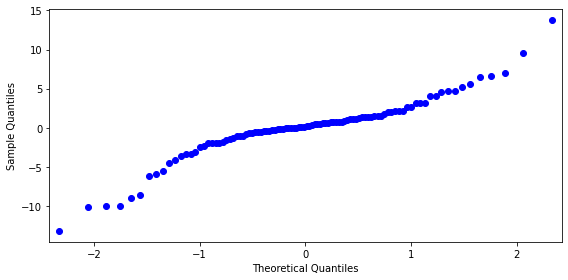

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
# QQ-plot of a linear model with two explanatory variables without
# any interaction term
#fig.savefig("ch14-qqplot-model-1.pdf")

As can be seen in the figure, the points in the QQ-plot significantly deviate from a linear relation, suggesting that the observed residuals are unlikely to be a sample of a
normal distributed random variable. In summary, these indicators provide evidence that
the model that we used is not sufficient and that we might need to refine the model. We
can include the missing interaction term by adding it to the Patsy formula and repeat the
steps from the previous analysis:

In [ ]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4839.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.37e-104
Time:                        14:57:12   Log-Likelihood:                -62.731
No. Observations:                 100   AIC:                             133.5
Df Residuals:                      96   BIC:                             143.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0157      0.047     21.762      0.0

In this case we can see that the R-squared statistic is significantly higher, 0.993,
indicating a nearly perfect correspondence between the model and the data. 

In [ ]:
result.rsquared

0.9934309132634487

Note that we can always increase the R-squared statistic by introducing more variables, but we want to make sure that we do not add variables with low predictive power (small coefficient and high corresponding p-value), since it would make the model susceptible to overfitting, and as usual we require that the residuals be normally distributed. Repeating the normality test and the QQ-plot from the previous analysis
with the updated model results in a relatively high p-value (0.081) and a relatively linear
QQ-plot (see next figure). This suggests that in this case the residuals could very well be
normally distributed (as we know they are, by design, in this example).

In [ ]:
z, p = stats.normaltest(result.fittedvalues.values)
p

3.820070656771404e-05

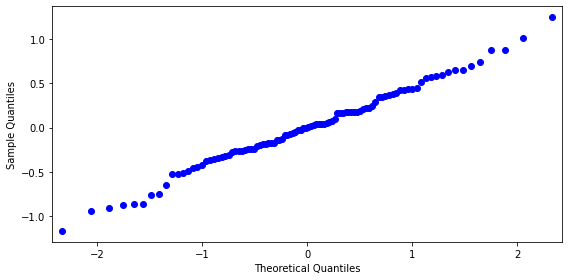

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
# QQ-plot of a linear model with two explanatory variables with an
# interaction term
#fig.savefig("ch14-qqplot-model-2.pdf")

Once we are satisfied with the fit of the model, we can extract the model coefficients
from the result object using the params attribute.

In [ ]:
result.params

Intercept    1.015714
x1           2.010336
x2           3.043880
x1:x2        4.048962
dtype: float64

Also, we can predict the values of new observations using the predict method,
which takes as argument a NumPy array or DataFrame object with values of the
independent variables ($x_1$ and $x_2$ in this case). For example, since the current problem
has only two independent variables, we can visualize the predictions of the model as a
contour plot. To this end, we first construct a DataFrame object with the $x_1$ and $x_2$values
for which we want to predict the y-value using the fitted model.

In [ ]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

Using the ``predict`` method of the result object obtained from the fitting of the
model, we can compute the predicted y values for the new set of values of the response
variables.

In [ ]:
y_pred = result.predict(new_data)

The result is a NumPy array (vector) with the same length as the data vectors ``X1.ravel()`` and ``X2.ravel()``. To be able to plot the data using the Matplotlib contour`function, we first resize the ``y_pred`` vector to a square matrix.

In [ ]:
y_pred.shape
y_pred = y_pred.values.reshape(50, 50)

The contour graphs of the true model and the fitted model are shown in the next figure, which demonstrate that the agreement of the model fitted to the 100 noisy observations
of $y$ is sufficient to reproduce the function rather accurately in this example.

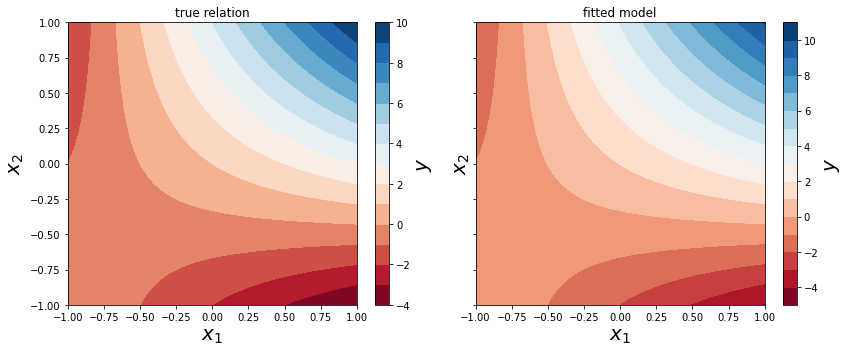

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
#fig.savefig("ch14-comparison-model-true.pdf")

In the example we have looked at here, we used the ordinary least square (``ols``)
method to fit the model to the data. Several other options are also available, such as
the robust linear model (``rlm``) that is suitable if there are significant outliers in the observations, and variants of the generalized linear model that is suitable, for example, if the response variable can take only discrete values. This is the topic of the following section.

## Discrete regression

Regression with discrete dependent variables (e.g., binary outcomes) requires different techniques than the linear regression model that we have seen so far. The reason is that linear regression requires that the response variable is a normally distributed continuous variable, which cannot be used directly for a response variable that has only a few
discrete possible outcomes, such as binary variables or variables taking positive integer values. However, using a suitable transformation, it is possible to map a linear predictor to an interval that can be interpreted as a probability of different discrete outcomes. For example, in the case of binary outcomes, one popular transformation is the logistic function $log(p/(1 − p)) = \beta_0 + \beta ∙ x$, or $p = (1 + exp (−\beta_0 − \beta_1 ∙ x))−1 $
, which maps $x 	\in [−∞,∞]$ to $p \in [0,1]$. In other words, the continuous or discrete feature vector x is mapped via
the model parameters $\beta_0$ and $\beta_1$ and the logistic transformation onto a probability p. If $p < 0.5$, it can be taken to predict that $y = 0$, and $p \geq 0.5$ can be taken to predict $y = 1$. This
procedure, which is known as logistic regression, is an example of a binary classifier. 

The statsmodels library provides several methods for discrete regression, including
the Logit class, the related Probit class (which uses a cumulative distribution function of the normal distribution rather than the logistic function to transform the linear predictor to the $[0, 1]$ interval), the multinomial logistic regression class MNLogit (for more than two categories), and the Poisson regression class Poisson for Poisson distributed count variables (positive integers).

## Logistic Regression

As an example of how to perform a logistic regression with statsmodels, we first load a
classic dataset using the ``sm.datasets.get_rdataset`` function, which contains sepal
and petal lengths and widths for a sample of Iris flowers, together with a classification of the species of the flower. Here we will select a subset of the dataset corresponding to two different species and create a logistic model for predicting the type of species from
the values of the petal length and width. The info method gives a summary of which
variables contained in the dataset:

In [3]:
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To see how many unique types of species are present in the Species column, we can
use the unique method for the Pandas series that is returned when extracting the column
from the data frame object:

In [4]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

This dataset contains three different types of species. To obtain a binary variable that
we can use as the response variable in a logistic regression, here we focus only on the data for the two species versicolor and virginica. For convenience we create a new data frame, ``df_subset``, for the subset of the dataset corresponding to those species:


In [6]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

To be able to use logistic regression to predict the species using the other variables as independent variables, we first need to create a binary variable that corresponds to the two different species. Using the map method of the Pandas series object, we can map the two species names into binary values 0 and 1.

In [7]:
df_subset.Species = df_subset.Species.map({"versicolor": 1,
                                           "virginica": 0})

We also need to rename the columns with names that contain period characters to names that are valid symbol names in Python (e.g., by replacing the “.” characters
with “_”), or else Patsy formulas that include these column names will be interpreted incorrectly. To rename the columns in a DataFrame object, we can use the rename method and pass a dictionary with name translations as the columns argument:

In [8]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
                          "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length",
                          "Petal.Width": "Petal_Width"},
                 inplace=True)

After these transformations we have a DataFrame instance that is suitable for use in a logistic regression analysis:

In [9]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


To create a logistic model that attempts to explain the value of the Species variable
with Petal_length and Petal_Width as independent variables, we can create an
instance of the ``smf.logit`` class and use the Patsy formula "Species ~ Petal_Length +
Petal_Width":

In [10]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", 
                  data=df_subset)

As usual, we need to call the fit method of the resulting model instance to actually fit the model to the supplied data. The fit is performed with maximum likelihood optimization.

In [11]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


As for regular linear regression, we can obtain a summary of the fit of the model to
the data by printing the output produced by the summary method of the result object. In
particular, we can see the fitted model parameters with an estimate for its z-score and the corresponding p-value, which can help us judge whether an explanatory variable is significant or not in the model.

In [12]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.8517
Time:                        09:20:33   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

The result object for logistic regression also provides the method ``get_margeff``,
which returns an object that also implements a summary method that outputs
information about the marginal effects of each explanatory variable in the model.

In [13]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


When we are satisfied with the fit of the model to the data, we can, for example,
use it to predict the value of the response variable for new values of the explanatory
variables. For this we can use the predict method in the result object produced by the
model fitting, and to it we need to pass a data frame object with the new values of the
independent variables.

In [14]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})

df_new["P-Species"] = result.predict(df_new)

The result is an array with probabilities for each observation to correspond to the
response y = 1, and by comparing this probability to the threshold value 0.5, we can generate predictions for the binary value of the response variable:

In [17]:
df_new["P-Species"].head(3)

0    0.003453
1    0.999999
2    0.996465
Name: P-Species, dtype: float64

In [18]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

The intercept and the slope of the line in the plane spanned by the coordinates
Petal_Width and Petal_Length that define the boundary between a point that is
classified as y = 0 and y = 1, respectively, can be computed from the fitted model parameters. The model parameters can be obtained using the params attribute of the result object:

In [19]:
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

Finally, to access the model and its predictions for new data points, we plot a scatter plot of the fitted (squares) and predicted (circles) data where data corresponding to the species virginica is coded with blue (dark) color, and the species versicolor is coded with green (light) color.

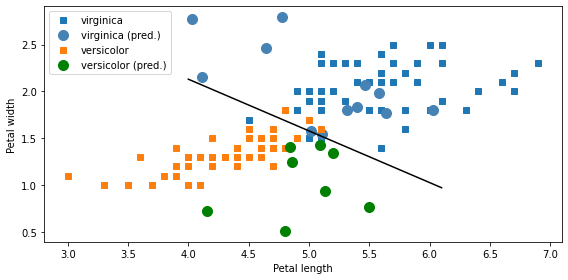

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()
# fig.savefig("ch14-logit.pdf")
# The result of a classification of Iris species using Logit regression with
# petal length and width and independent variables

## Poisson Model

Another example of discrete regression is the Poisson model, which can describe a process where the response variable is a success count for many attempts that each has a low probability of success. The Poisson model is also an example of a model that can be treated with the generalized linear model, using the natural logarithm as the link function. To see how we can fit data to a Poisson model using the statsmodels library, we will analyze another
interesting dataset from the R dataset repository: The discoveries dataset contains counts of the number of great discoveries between 1860 and 1959. Because of the nature of the data, it is reasonable to assume that the counts might be Poisson distributed. To explore this hypothesis, we begin with loading the dataset using the ``sm.datasets.get_rdataset`` function and display the first few values to obtain an understanding of the format of the data.

In [32]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"value":"discoveries"}, 
                                           inplace=False)
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


Here we can see that the dataset contains integer counts in the discoveries series
and that the first few years in the series have on average a few great discoveries. To
see if this is typical data for the entire series, we can plot a bar graph of the number of discoveries per year, as shown in the next figure. 

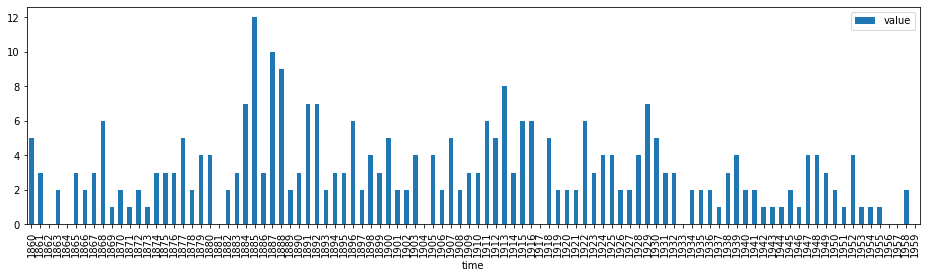

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
# The number of great discoveries per year

Judging from the figure, the number of great discoveries seems to be relatively
constant over time, although a slightly declining trend might be noticeable. Nonetheless, the initial hypothesis that the number of discoveries might be Poisson distributed does not look immediately unreasonable. To explore this hypothesis more systematically, we can fit the data to a Poisson process, for example, using the ``smf.poisson`` class and the Patsy formula "discoveries ~ 1", which means that we model the discoveries variable with only an intercept coefficient (the Poisson distribution parameter).

In [34]:
model = smf.poisson("discoveries ~ 1", data=df)

As usual we have to call the fit method to actually perform the fit of the model to
the supplied data: 

In [35]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


The summary method of the result objects displays a summary of model fit and
several fit statistics

In [36]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                   0.000
Time:                        09:34:58   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


The model parameters, available via the params attribute of the result object, are
related to the $\lambda$ parameter of the Poisson distribution via the exponential function (the inverse of the link function):

In [37]:
lmbda = np.exp(result.params)

Once we have the estimated $\lambda$ parameter of the Poisson distribution, we can, for example, compare the histogram of the observed count values with the theoretical counts, which we can obtain from a Poisson-distributed random variable from the SciPy stats library.

In [38]:
X = stats.poisson(lmbda)

In addition to the fit parameters, we can also obtain estimated confidence intervals
of the parameters using the ``conf_int`` method:

In [39]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


To assess the fit of the data to the Poisson distribution, we also create random
variables for the lower and upper bounds of the confidence interval for the model
parameter:

In [40]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

Finally, we graph the histogram of the observed counts with the theoretical
probability mass functions for the Poisson distributions corresponding to the fitted
model parameter and its confidence intervals. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


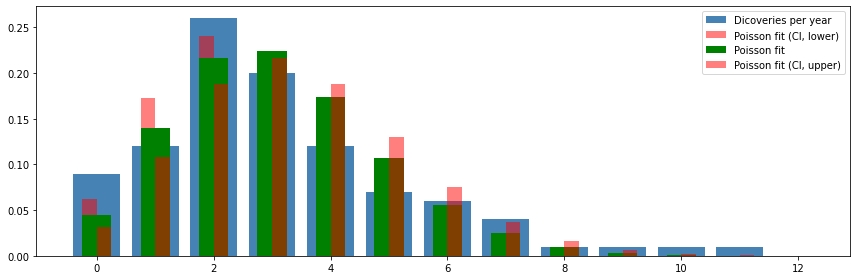

In [41]:
v, k = np.histogram(df.values,
                    bins=12, 
                    range=(0, 12), 
                    normed=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.bar(k[:-1], 
       v, 
       color="steelblue",  
       align='center', 
       label='Dicoveries per year') 
ax.bar(k-0.125,
       X_ci_l.pmf(k), 
       color="red", 
       alpha=0.5, 
       align='center', 
       width=0.25, 
       label='Poisson fit (CI, lower)')
ax.bar(k,
       X.pmf(k), 
       color="green", 
       align='center', 
       width=0.5, 
       label='Poisson fit')
ax.bar(k+0.125, 
       X_ci_u.pmf(k), 
       color="red", 
       alpha=0.5, 
       align='center',
       width=0.25,
       label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
# fig.savefig("ch14-discoveries-per-year.pdf")
# Comparison of histograms of the number of great discoveries per
# year and the probability mass function for the fitted Poisson model

The result shown in the figure above indicates that the dataset of great discoveries is not well described by a Poisson process, since the agreement between Poisson probability mass function and the observed counts deviates  significantly. The hypothesis that the
number of great discoveries per year is a Poisson process must therefore be rejected.
A failure to fit a mode to a given dataset is of course a natural part of the statistical modeling process, and although the dataset turned out not to be Poisson distributed (perhaps because years with a large and small number of great discovers tend to be clustered together), we still have gained insight by the failed attempt to model it as such.Because of the correlations between the number of discoveries at any given year and its
recent past, a time-series analysis such as discussed in the following section could be a better approach.

## Time series

Time-series analysis is an important field in statistical modeling that deals with
analyzing and forecasting future values of data that is observed as a function of time.
Time-series modeling differs in several aspects from the regular regression models
that we have looked at so far. Perhaps most importantly, a time series of observations
typically cannot be considered as a series of independent random samples from a
population. Instead there is often a rather strong component of correlation between
observations that are close to each other in time. Also, the independent variables in
a time-series model are the past observations of the same series, rather than a set of distinct factors. For example, while a regular regression can describe the demand for a product as a function of its price, in a time-series model it is typical to attempt to predict
the future values from the past observations. This is a reasonable approach when there are autocorrelations such as trends in the time series under consideration (e.g., daily or weekly cycles, or steady increasing trends, or inertia in the change of its value). Examples of time series include stock prices, and weather and climate observations, and many other temporal processes in nature and in economics.

An example of a type of statistical model for time series is the autoregressive (AR)
model, in which a future value depends linearly on p previous values:
$Y_t = \beta_0 + \sum_{n=1}^{p}\beta_nY_{t-n} + \epsilon_t$, where $\beta_0$ is a constant and $\beta_n, 1 \leq n \leq N$ are the coefficients that define the AR model. The error $\epsilon_t$ is assumed to be white noise without autocorrelation. 
Within this model, all autocorrelation in the time series should therefore be aptured by the linear dependence on the $p$ previous values. A time series which depends linearly on only one previous value (in a suitable unit of time) can be fully modeled with an AR process with p=1, denoted as AR(1), and a time series that depends linearly on two previous values can be modeled by an AR(2) process, and so on. The AR model is a special case of the ARMA model, a more general model that also includes a moving average (MA) of $q$ previous residuals of the series: $Y_t = \beta_0 + \sum_{n=1}^{p}\beta_nY_{t-n}+\sum_{n=1}^{q}\theta_n\epsilon_{t-n}+\epsilon_t$, where the model parameters \theta_n are the weight factors for the moving average. This model is known as the ARMA model and is denoted by ARMA(p, q), where p is the number of autoregressive terms and q is the number of moving-average terms. Many other models for time-series model exist, but the AR and ARMA capture the basic ideas that are fundamental to many time-series applications.

The statsmodels library has a submodule dedicated to time-series analysis: ``sm.tsa``, which implements several standard models for time-series analysis, as well as graphical and statistical analysis tools for exploring properties of time-series data. For example, let’s visit the time series with outdoor temperature measurements and say that we want to predict the hourly temperature for a few days into the future based on previous observations using an AR model. For concreteness, we will take the temperatures measured during the month of March and predict the hourly temperature for the first 3 days of April. We first load the dataset into a Pandas DataFrame object:

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/jrjohansson/numerical-python-book-code/master/temperature_outdoor_2014.tsv", 
                 header=None,
                 delimiter="\t",
                 names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")

df = df.set_index("time").resample("H").mean()

For convenience we extract the observations for March and April and store them in
new DataFrame objects, ``df_march`` and ``df_april``, respectively:

In [43]:
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

Here we will attempt to model the time series of the temperature observations using
the AR model, and an important condition for its applicability is that it is applied to a stationary process, which does not have autocorrelation or trends other than those explained by the terms in the model. The function ``plot_acf`` in the ``smg.tsa`` model is a useful graphical tool for visualizing autocorrelation in a time series. It takes an array of time-series observations and graphs the autocorrelation with increasing time delay on the ``x`` axis. The optional lags argument can be used to determine how many time steps
are to be included in the plot, which is useful for long time series and when we only
wish to see the autocorrelation for a limited number of time steps. The autocorrelation functions for the temperature observations and its first-, second-, and third-order differences are generated and graphed using the ``plot_acf`` function in the following
code, and the resulting graph is shown next. 

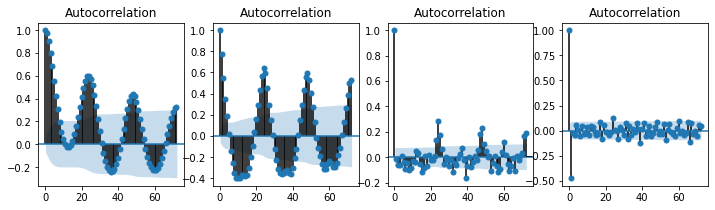

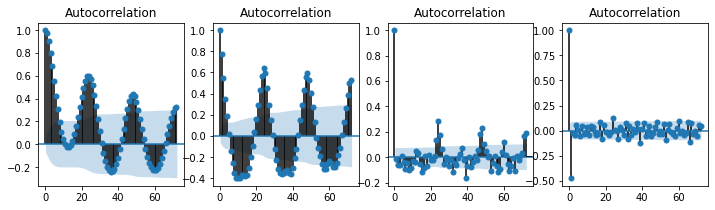

In [45]:
fig, axes = plt.subplots(1,
                         4, 
                         figsize=(12, 3))

smg.tsa.plot_acf(df_march.temp,
                 lags=72, 
                 ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(),
                 lags=72,
                 ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(),
                 lags=72,
                 ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(),
                 lags=72,
                 ax=axes[3])
# Autocorrelation function for temperature data at increasing order of
# differentiation, from left to right

We can see a clear correlation between successive values in the time series in
the leftmost graph, but for increasing order, differencing of the time series reduces the autocorrelation significantly. Suggesting that while each successive
temperature observation is strongly correlated with its preceding value, such
correlations are not as strong for the higher-order changes between the successive
observations. Taking the difference of a time series is often a useful way of detrending it and eliminating correlation. The fact that taking differences diminishes the structural autocorrelation suggests that a sufficiently high-order AR model might be able to model the time series.

To create an AR model for the time series under consideration, we can use the ``sm.
tsa.AR`` class. It can, for example, be initiated with Pandas series that is indexed by ``DatetimeIndex`` or ``PeriodIndex`` (see the docstring of AR for alternative ways of pass timeseries data to this class):

In [46]:
model = sm.tsa.AR(df_march.temp)

When we fit the model to the time-series data, we need to provide the order of the AR
model. Here, since we can see a strong autocorrelation with a lag of 24 periods (24 hours), we must at least include terms for 24 previous terms in the model. To be
on the safe side, and since we aim to predict the temperature for 3 days, or 72 hours, here we choose to make the order of the AR model correspond to 72 hours as well:

In [47]:
result = model.fit(72)

An important condition for the AR process to be applicable is that the residuals of the series are stationary (no remaining autocorrelation and no trends). The Durbin-Watson statistical test can be used to test for stationary in a time series. It returns a value between 0 and 4, and values close to 2 correspond to time series that do not have remaining autocorrelation. We can also use the ``plot_acf`` function to graph the autocorrelation function for the residuals and to verify that the there is no significant autocorrelation.

In [48]:
sm.stats.durbin_watson(result.resid)

1.9985623006352908

We can also use the ``plot_acf`` function to graph the autocorrelation function for the residual and verify that the there is no significant autocorrelation.

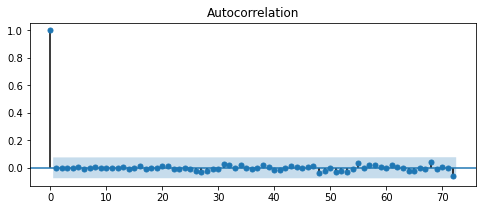

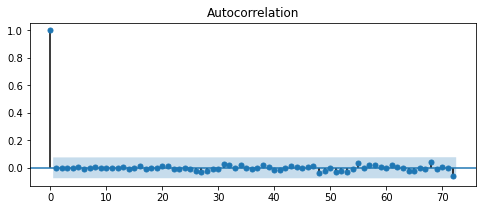

In [49]:
fig, ax = plt.subplots(1,
                       1,
                       figsize=(8, 3))
smg.tsa.plot_acf(result.resid,
                 lags=72,
                 ax=ax)
# Autocorrelation plot for the residual from the AR(72) model for the
# temperature observations

The Durbin-Watson statistic close to 2 and the absence of autocorrelation in the figure above suggest that the current model successfully explains the fitted data. We can now proceed to forecast the temperature for future dates using the predict method in
the result object returned by the model fit method:

In [50]:
temp_3d_forecast = result.predict("2014-04-01", "2014-04-4")

Next we graph the forecast (red) together with the previous 3 days of temperature
observations (blue) and the actual outcome (green), for which the result is shown below:

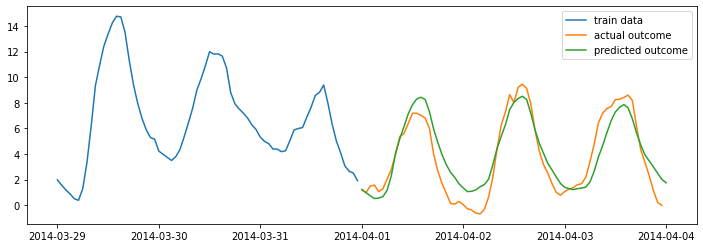

In [51]:
fig, ax = plt.subplots(1,
                       1,
                       figsize=(12, 4))

ax.plot(df_march.index.values[-72:], 
        df_march.temp.values[-72:],
        label="train data")
ax.plot(df_april.index.values[:72],
        df_april.temp.values[:72],
        label="actual outcome")
ax.plot(pd.date_range("2014-04-01",
                      "2014-04-4", 
                      freq="H").values,
        temp_3d_forecast, 
        label="predicted outcome")
ax.legend()
# Observed and predicted temperatures as a function of time

The agreement of the predicted temperature and the actual outcome shown above is rather good. However, this will of course not always be the case, as the temperature cannot be forecasted based solely on previous observations. Nonetheless, within a period of a stable weather system, the hourly temperature of a day may be accurately forecasted with an AR model, accounting for the daily variations and other steady trends.

In addition to the basic AR model, ``statsmodels`` also provides the ARMA
(autoregressive moving average) and ARIMA (autoregressive integrated moving average)
models. The usage patterns for these models are similar to that of the AR model we have
used here, but there are some differences in the details. Refer to the docstrings for ``sm.tsa.ARMA`` and ``sm.tsa.ARIMA`` classes and the official statsmodels documentation for further information.

# Combinatorics


## Permutations

A mathematical permutation set is all possible orderings of n items. For example, if $n = 3$ and the items are the integers 
$(0, 1, 2)$ then there are six possible permutation elements:

$$
(0, 1, 2) \\
(0, 2, 1) \\
(1, 0, 2) \\
(1, 2, 0) \\
(2, 0, 1) \\
(2, 1, 0) \\ 
$$


Python supports permutations in the SciPy special module and in the Python itertools module. Interestingly, NumPy has no direct support for permutations, but it is possible to implement custom permutation functions using NumPy arrays.

In [ ]:
import numpy as np
import itertools as it
import scipy.special as ss

class Permutation:
  def __init__(self, n):
    self.n = n
    self.data = np.arange(n)

  @staticmethod
  def my_fact(n):
    ans = 1
    for i in range(1, n+1):
      ans *= i
    return ans

  @staticmethod
  def my_fact_rec(n):
    if n == 0 or n == 1:
      return 1
    else:
      return n * Permutation.my_fact_rec(n-1)

  def __str__(self):
    s = "# "
    for i in range(self.n):
      s = s + str(self.data[i]) + " "
    s = s + "#"
    return s

# =====

print("\nBegin permutation demo \n")

n = 3
print("Setting n = " + str(n))
print("") 

num_perms = ss.factorial(n)
print("Using scipy.special.factorial(n) there are ") 
print(str(num_perms))
print("possible permutation elements")
print("")

print("Making all permutations using itertools.permutations()")
all_perms = it.permutations(range(n))
p = all_perms.__next__()

print("The first itertools permutation is ") 
print(p)
print("")

num_perms = Permutation.my_fact_rec(n)
print("Using my_fact(n) there are " + str(num_perms), "possible permutation elements","")

print("Making a custom Permutation object ")
p = Permutation(n)
print("The first custom permutation element is ")
print(p)

print("\nEnd demo \n")


Begin permutation demo 

Setting n = 3

Using scipy.special.factorial(n) there are 
6.0
possible permutation elements

Making all permutations using itertools.permutations()
The first itertools permutation is 
(0, 1, 2)

Using my_fact(n) there are 6 possible permutation elements 
Making a custom Permutation object 
The first custom permutation element is 
# 0 1 2 #

End demo 



The demo program begins by importing three modules:

``import numpy as np \
import itertools as it \
import scipy.special as ss``

The itertools module has the primary permutations class, but the closely associated ``factorial()`` function is defined in the special submodule of the scipy module. If this feels a bit awkward to you, you're not alone.
The demo program defines a custom ``Permutation`` class. In most cases, you will only want to define a custom implementation of a function when you need to implement some specialized behavior, or you want to avoid using a module that contains the function.
Program execution begins by setting up the number of permutation elements:

``n = 3 \
print("Setting n = " + str(n))``

Using lowercase n for the number of permutations is traditional, so you should use it unless you have a reason not to. Next, the demo program determines the number of possible permutations using the SciPy factorial() function:
num_perms = ss.factorial(n) print "Using scipy.special.factorial(n) there are ", print str(num_perms), print "possible permutation elements"
The factorial(n) function is often written as n! as a shortcut. The factorial of a number is best explained by example:
factorial(3) = 3 * 2 * 1 = 6 factorial(5) = 5 * 4 * 3 * 2 * 1 = 120
The value of ``factorial(0)`` is usually considered a special case and defined to be 1. Next, the demo creates a Python permutations iterator:

``all_perms = it.permutations(range(n))``

I like to think of a Python iterator object as a little factory that can emit data when a request is made of it using an explicit or implicit call to a ``next()`` function. Notice the call to the ``permutations()`` function accepts ``range(n)`` rather than just ``n``, as you might have thought.
The demo program requests and displays the first itertools permutation element like so:

``p = all_perms.next() \
print("The first itertools permutation is ") \
print(p)``

Next, the demo program uses the custom functions. First, the ``my_fact()`` function is called:

``num_perms = Permutation.my_fact(n) \
print("Using my_fact(n) there are " + str(num_perms)) \ print("possible permutation elements")``

Notice that the call to ``my_fact()`` is appended to Permutation, which is the name of its defining class. This is because the ``my_fact()`` function is decorated with the ``@staticmethod`` attribute.
Next, the demo creates an instance of the custom ``Permutation`` class. The ``Permutation`` class ``__init__()`` constructor method initializes an object to the first permutation element so there's no need to call a ``next()`` function:

``p = Permutation(n)``

``print("The first custom permutation element is ")``

``print(p)``

We overload the print function by defining ``__str__`` .It displays a ``Permutation`` element delimited by the % character so that the element can be easily distinguished from a tuple, a list, or another Python collection. I used % because both permutation and percent start with the letter p.
The custom ``my_fact()`` function is short and simple:

    def my_fact(n):
      ans = 1 for i in range(1, n+1):
        ans *= i 
      return ans

The mathematical factorial function is often used in computer science classes as an example of a function that can be implemented using recursion:

    @staticmethod 
    def my_fact_rec(n): 
      if n == 0 or n == 1: 
        return 1
      else: 
        return n * Permutation.my_fact_rec(n-1)

Although recursion has a certain mysterious aura, in most situations (such as this one), **recursion is highly inefficient and so should be avoided**.

An option for any implementation of a factorial function, especially where the function will be called many times, is to create a pre-calculated lookup table with values for the first handful (say 1,000) results. The extra storage is usually a small price to pay for much-improved performance.

### Permutation successor

When working with mathematical permutations, a key operation is generating the successor to a given permutation element. For example, if $n = 3$ and the items are the integers $(0, 1, 2)$ then there are six possible permutation elements. When listed in what is called lexicographical order, the elements are:

$$
(0, 1, 2) \\
(0, 2, 1) \\
(1, 0, 2) \\
(1, 2, 0) \\
(2, 0, 1) \\
(2, 1, 0)
$$

Notice that if we removed the separating commas and interpreted each element as an ordinary integer (like 120), the elements would be in ascending order (12 < 21 < 102 < 120 < 201 < 210).

In [ ]:
import numpy as np
import itertools as it

class Permutation:
  def __init__(self, n):
    self.n = n
    self.data = np.arange(n)

  def __str__(self):
    s = "# "
    for i in range(self.n):
      s = s + str(self.data[i]) + " "
    s = s + "#"
    return s

  def successor(self):
    res = Permutation(self.n) # result
    res.data = np.copy(self.data)

    left = self.n - 2
    while res.data[left] > res.data[left+1] and left >= 1:
      left -= 1

    if left == 0 and res.data[left] > res.data[left+1]:
      return None

    right = self.n - 1
    while res.data[left] > res.data[right]:
      right -= 1

    res.data[left], res.data[right] = \
                     res.data[right], res.data[left]

    i = left + 1
    j = self.n - 1
    while i < j:
      tmp = res.data[i]
      res.data[i] = res.data[j]
      res.data[j] = tmp
      i += 1; j -= 1
    return res

# =====

print("\nBegin permutation successor demo \n")

n = 3
print("Setting n = " + str(n))
print("")

perm_it = it.permutations(range(n))
print("Iterating all permutations using itertools permutations(): ")

for p in perm_it:
  print("p = " + str(p))
print("")

p = Permutation(n)
print("Iterating all permutations using custom Permutation class: ")
while p is not None:
  print("p = " + str(p))
  p = p.successor()

print("\nEnd demo \n")


Begin permutation successor demo 

Setting n = 3

Iterating all permutations using itertools permutations(): 
p = (0, 1, 2)
p = (0, 2, 1)
p = (1, 0, 2)
p = (1, 2, 0)
p = (2, 0, 1)
p = (2, 1, 0)

Iterating all permutations using custom Permutation class: 
p = # 0 1 2 #
p = # 0 2 1 #
p = # 1 0 2 #
p = # 1 2 0 #
p = # 2 0 1 #
p = # 2 1 0 #

End demo 



The demo program begins by importing two modules:
``import numpy as np``

``import itertools as it``

Since the itertools module has many kinds of iterable objects, an alternative is to bring just the permutations iterator into scope:
``from itertools import permutations``

The demo program defines a custom Permutation class. In most cases, you will only want to define a custom implementation of a function when you need to implement some specialized behavior, or you want to avoid using a module that contains the function.

Program execution begins by setting up the number of permutation elements:

``n = 3``

``print("Setting n = " + str(n))``

Using lowercase n for the number of permutations is traditional, so you should use it unless you have a reason not to.
Next, the demo program iterates through all possible permutation elements using an implicit mechanism:

    perm_it = permutations(range(n))
    print("Iterating all permutations using itertools permutations(): ")
    for p in perm_it: 
      print("p = " + str(p))
    print("")

The ``perm_it`` iterator can emit all possible permutation elements. In most situations, Python iterators are designed to be called using a for item in iterator pattern, as shown. In other programming languages, this pattern is sometimes distinguished from a regular for loop by using a foreach keyword.

Note that the ``itertools.permutations()`` iterator emits tuples, indicated by the parentheses in the output, rather than a list or a NumPy array.

It is possible, but somewhat awkward, to explicitly call the permutations iterator using the ``next()`` function like so:

    perm_it = it.permutations(range(n))
    while True:
      try:
        p = perm_it.next() 
        print("p = " + str(p))
      except StopIteration: 
        break
    print("")

By design, iterator objects don't have an explicit way to signal the end of iteration, such as an ``end()`` function or returning a special value like None. Instead, when an iterator object has no more items to emit and a call to ``next()`` is made, a ``StopIteration`` exception is thrown. To terminate a loop, you must catch the exception.

Next, the demo program iterates through all permutation elements for ``n = 3`` using the program-defined Permutation class:

    p = Permutation(n) 
    print("Iterating all permutations using custom Permutation class: ")
    while p is not None:
      print("p = " + str(p))
      p = p.successor()

The ``successor()`` function of the ``Permutation`` class uses a traditional stopping technique by returning ``None`` when there are no more permutation elements. The function ``successor()`` uses an unobvious approach to determine when the current permutation element is the last one. A straightforward approach isn't efficient. For example, if $n = 5$, the last element is $(4 3 2 1 0)$ and it'd be very time-consuming to check if $data[0] > data[1] > data[2] > . . > data[n-1]$ on each call.

The logic in the program-defined ``successor()`` function is rather clever. Suppose $n = 5$ and the current permutation element is:

``# 0 1 4 3 2 #``

The next element in lexicographical order after $01432$, using the digits $0$ through $4$, is $02134$. The ``successor()`` function first finds the indices of two items to swap, called left and right. In this case, ``left = 1`` and ``right = 4``. The items at those indices are swapped, giving a preliminary result of $02431`$. Then the items from index right through the end of the element are placed in order (431 in this example) giving the final result of $02134$.

### Permutation element

When working with mathematical permutations, it's often useful to be able to generate a specific element. For example, if $n = 3$ and the items are the integers $(0, 1, 2)$, then there are six permutation elements. When listed in lexicographical order, the elements are:

$$
[0] (0, 1, 2) \\
[1] (0, 2, 1) \\
[2] (1, 0, 2) \\
[3] (1, 2, 0) \\
[4] (2, 0, 1) \\
[5] (2, 1, 0)
$$

In many situations, you want to iterate through all possible permutations, but in some cases you may want to generate just a specific permutation element. For example, a function call like ``pe = perm_element(4)``would store $(2, 0, 1)$ into ``pe``.

In [ ]:
import numpy as np
import itertools as it
import time

class Permutation:
  def __init__(self, n):
    self.n = n
    self.data = np.arange(n)

  def __str__(self):
    s = "# "
    for i in range(self.n):
      s = s + str(self.data[i]) + " "
    s = s + "#"
    return s

  def element(self, idx):
    # if idx >= Permutation.my_fact(self.n):
    #   return None

    result = Permutation(self.n)
    
    factoradic = np.zeros(self.n)
    for j in range(1, self.n + 1):
      factoradic[self.n-j] = idx % j
      idx = idx / j

    for i in range(self.n):
      factoradic[i] += 1

    result.data[self.n - 1] = 1

    for i in range(self.n - 2, -1, -1):
      result.data[i] = factoradic[i]
      for j in range(i + 1, self.n):  
        if result.data[j] >= result.data[i]:
          result.data[j] += 1

    for i in range(self.n):
      result.data[i] -= 1

    return result;

# =====

def perm_element(n, idx):
  p_it = it.permutations(range(n))
  i = 0
  for p in p_it:
    if i == idx:
      return p
      break
    i += 1

# =====

print("\nBegin permutation element demo \n")

n = 20 # 20! = 2,432,902,008,176,640,000
print("Setting n = " + str(n) + "\n")
idx = 1000000000 # not even close to last element

print("Element " + str(idx) + " using itertools.permutations() is ")
start_time = time.clock()
pe = perm_element(n, idx)
end_time = time.clock()
elapsed_time = end_time - start_time
print(pe )
print("Elapsed time = " + str(elapsed_time) + " seconds ")
print("")

p = Permutation(n)
start_time = time.clock()
pe = p.element(idx)
end_time = time.clock()
elapsed_time = end_time - start_time
print("Element " + str(idx) + " using custom Permutation class is ")
print(pe)
print("Elapsed time = " + str(elapsed_time) + " seconds ")
print("")

print("\nEnd demo \n")


Begin permutation element demo 

Setting n = 20

Element 1000000000 using itertools.permutations() is 
(0, 1, 2, 3, 4, 5, 6, 9, 8, 7, 15, 17, 14, 16, 19, 11, 13, 18, 10, 12)
Elapsed time = 136.867422 seconds 

Element 1000000000 using custom Permutation class is 
# 0 1 2 3 4 5 6 9 8 7 15 17 14 16 19 11 13 18 10 12 #
Elapsed time = 0.0002590000000282089 seconds 


End demo 



The demo program begins by importing three modules:

``import numpy as np``

``import itertools as it``

``import time``

The demo program defines a custom ``Permutation`` class that has an ``element()`` member function and a stand-alone function ``perm_element()`` that is not part of a class. Both functions return a specific permutation element. Function ``perm_element()`` uses the built-in ``permutations()`` iterator from the ``itertools`` module. Function ``element()`` uses a NumPy array plus a clever algorithm that involves something called the factoradic. Program execution begins by setting up the order of a permutation, n:

    n = 20
    print("Setting n = " + str(n) + "\n")

The order of a permutation is the number of items in each permutation. For $n = 20$ there are $20! = 2,432,902,008,176,640,000$ different permutation elements. Next, the demo finds the permutation element 1,000,000,000 using the program-defined ``perm_element()`` function:

    print("Element " + str(idx) + ") using itertools.permutations() is ")
    start_time = time.clock()
    pe = perm_element(n, idx) 
    end_time = time.clock()

After the permutation element has been computed, the element and the elapsed time required are displayed:

    elapsed_time = end_time - start_time 
    print(pe) 
    print("Elapsed time = " + str(elapsed_time) + " seconds ")

In this example, the ``perm_element()`` function took almost 2 and a half minutes to execute. Not very good performance.

Next, the demo computes the same permutation element using the program-defined Permutation class:

    p = Permutation(n) 
    start_time = time.clock() 
    pe = p.element(idx) 
    end_time = time.clock()

Then the element and the elapsed time required are displayed using the custom class approach:

    elapsed_time = end_time - start_time 
    print("Element " + str(idx) + " using custom Permutation class is ")
    print(pe.as_string())
    print("Elapsed time = " + str(elapsed_time) + " seconds ")

The elapsed time using the custom ``Permutation element()`` function class was approximately 0.0003 seconds—much better performance than the 136+ seconds for the itertools-based function.

It really wasn't a fair fight. The ``perm_element()`` function works by creating an ``itertools.permutations`` iterator and then generating each successive permutation one at a time until the desired permutation element is reached. The function definition is:

    p_it = it.permutations(range(n)) # make a permutation iterator 
    i = 0 # index counter 
    for p in p_it: # request next permutation
    if i == idx: # are we there yet
      return p # if so, return curr permutation tuple 
      break # and break out of loop 
    i += 1 # next index

On the other hand, the custom ``element()`` function uses some very clever mathematics and an entity called the factoradic of a number to construct the requested permutation element directly.
The regular decimal representation of numbers is based on powers of 10. For example, 1047  is $(1 * 10^3) + (0 * 10^2) + (4 * 10^1) + (7 * 10^0)$. The factoradic of a number is an alternate representation based on factorials. For example, 1047 is $1232110$ because it's $(1 * 6!) + (2 * 5!) + (3 * 4!) + (2 * 3!) + (1 * 2!) + (1 * 1!) + (0 * 0!)$. 

Using some rather remarkable mathematics, it's possible to use the factoradic of a permutation element index to compute the element directly.

## Combinations

A mathematical combination set is a collection of all possible subsets of $k$ items selected from $n$ items. For example, if $n = 5$ and $k = 3$ and the items are the integers $(0, 1, 2, 3, 4)$, then there are 10 possible combination elements:
$$
(0, 1, 2) \\
(0, 1, 3) \\
(0, 1, 4) \\
(0, 2, 3) \\
(0, 2, 4) \\
(0, 3, 4) \\
(1, 2, 3) \\
(1, 2, 4) \\
(1, 3, 4) \\
(2, 3, 4)
$$

For combinations, the order of the items does not matter. Therefore, there is no element $(0, 2, 1)$ because it is considered the same as $(0, 1, 2)$. Python supports combinations in the SciPy special module and in the Python itertools module. There is no direct support for combinations in SciPy, but it's possible to implement combination functions using NumPy arrays.

In [ ]:
import numpy as np
import itertools as it
import scipy.special as ss

class Combination:
  # n == order, k == subset size
  def __init__(self, n, k):
    self.n = n
    self.k = k
    self.data = np.arange(self.k)

  def __str__(self):
    s = "^ "
    for i in range(self.k):
      s = s + str(self.data[i]) + " "
    s = s + "^"
    return s

  @staticmethod
  def my_choose(n, k):
    if n < k: return 0
    if n == k: return 1;
    
    delta = k
    imax = n - k
    if k < n-k:
      delta = n-k
      imax = k

    ans = delta + 1
    for i in range(2, imax+1):
      ans = (ans * (delta + i)) / i
    return ans

# =====

print("\nBegin combinations demo \n")

n = 5
k = 3
print("Setting n = " + str(n) + " k = " + str(k))
print("")

num_combs = ss.comb(n, k)
print("n choose k using scipy.comb() is ")
print(num_combs)
print("")

print("Making all combinations using itertools.combinations() ")
all_combs = it.combinations(range(n), k)

c = all_combs.__next__()
print("First itertools combination element is ")
print(c)
print("")

num_combs = Combination.my_choose(n, k)
print("n choose k using my_choose(n, k) is ")
print(num_combs)
print("")

print("Making a custom Combination object ")
c = Combination(n, k)
print("The first custom combination element is ")
print(c)

print("\nEnd demo \n")


Begin combinations demo 

Setting n = 5 k = 3

n choose k using scipy.comb() is 
10.0

Making all combinations using itertools.combinations() 
First itertools combination element is 
(0, 1, 2)

n choose k using my_choose(n, k) is 
10.0

Making a custom Combination object 
The first custom combination element is 
^ 0 1 2 ^

End demo 



The demo program begins by importing three modules:

``import numpy as np``
``import itertools as it`` 
``import scipy.special as ss``

The itertools module has the primary combinations class, but the closely associated ``comb()`` function is defined in the special submodule of the ``scipy`` module (and also in scipy.misc).

The demo program defines a custom ``Combination`` class. In most cases, you will only want to define a custom implementation of a function when you need to implement some specialized behavior, or you want to avoid using a module that contains the function.

Program execution begins by setting up the number of items $n$, and the subset size $k$:
    n = 5 
    k = 3 
    print("Setting n = " + str(n) + " k = " + str(k))

Lowercase $n$ and $k$ are most often used with combinations, so if you use different variable names it would be a good idea to comment on which is the number of items and which is the subset size. Next, the demo program determines the number of possible combination elements using the SciPy ``comb()`` function:

    num_combs = ss.comb(n, k) 
    print("n choose k using scipy.comb() is ")
    print(num_combs)

The function that returns the number of ways to select $k$ items from $n$ items is almost universally called ``choose(n, k)`` so it's not clear why the SciPy code implementation is named ``comb(n, k)``. The mathematical definition of ``choose(n, k)`` is $n! / k! * (n-k)!$ where ! is the factorial function. For example:
$$choose(5, 3) = 5! / (3! * 2!) = 120 / (6 * 2) = 10$$
As it turns out, a useful fact is that choose(n, k) = choose(n, n-k). For example, choose(10, 7) = choose(10, 3). The choose function is easier to calculate using smaller values of the subset size.
Next, the demo creates a Python ``combinations`` iterator:

``all_combs = it.combinations(xrange(n), k)``

I like to think of a Python iterator object as a little factory that can emit data when a request is made of it using an explicit or implicit call to a ``next()`` function. Notice the call to the ``it.combinations()`` function accepts ``range(n)`` rather than just ``n``. The choice of the name all_combs could be somewhat misleading if you're not familiar with Python iterators. The all_combs iterator doesn't generate all possible combination elements when it is created. It does, however, have the ability to emit all combination elements.

In addition to ``range()``, the ``it.combinations()`` iterator can accept any iterable object. For example:
``all_combs = it.combinations(np.array(["a", "b", "c"]), k)``
Next, the demo program requests and displays the first itertools combination element like so:
    c = all_combs.next() 
    print("The first itertools combination element is ")
    print(c)

Next, the demo program demonstrates the custom functions. First, the program-defined ``my_choose()`` function is called:

    num_combs = Combination.my_choose(n, k) 
    print("n choose k using my_choose(n, k) is ")
    print(num_combs)

Notice that the call to ``my_choose()`` is appended to ``Combination``, which is the name of its defining class. This is because the ``my_choose()`` function is decorated with the ``@staticmethod`` attribute.

Next, the demo creates an instance of the custom ``Combination`` class. The ``Combination`` class ``__init__()`` constructor method initializes an object to the first combination element, so there's no need to call a ``next()`` function to get the first element:

    print("Making a custom Combination object ")
    c = Combination(n, k)
    print("The first custom combination element is ")
    print(c)

We overload the print function by defining __str__ method. It displays a ``Combination`` element delimited by the ^ (carat) character so that the element can be easily distinguished from a tuple, a list, or another Python collection. I used ^ because both combination and carat start with the letter c.

The custom ``my_choose()`` function is rather subtle. It would be a weak approach to implement a choose function directly using the math definition because that would involve the calculation of three factorial functions. The factorial of a number can be very large. For example, $20!$ is $2,432,902,008,176,640,000$ and $1000!$ is an almost unimaginably large number.

The ``my_choose()`` function uses a clever alternate definition that is best explained by example:

``choose(10, 7) = choose(10, 3) = (10 * 9 * 8) / (3 * 2 * 1) = 120``

Expressed in words, to calculate a ``choose(n, k)`` value, first simplify k to an equivalent smaller k if possible. Then the result is a division with $k!$ on the bottom and $n * n-1 * n-2 * . . * (n-k+1)$ on the top.

Furthermore, the top and bottom parts of the division don't have to be computed fully. Instead, the product of each pair of terms in the top can be iteratively divided by a term in the bottom. For example:

``choose(10, 3) = 10 * 9 / 3 = 30 * 8 / 2 = 120``

    def my_choose(n, k): 
      if n < k: 
        return 0 
      if n == k: 
        return 1; 
      delta = k 
      imax = n - k 
      if k < n-k: 
        delta = n-k 
        imax = k 
      
      ans = delta + 1 
      for i in range(2, imax+1): 
        ans = (ans * (delta + i)) / i 
      
      return ans

The first two statements look for early exit conditions. The statements with delta and imax simplify k if possible. The for loop performs the iterated pair-multiplication and division.

### Combination successor

When working with mathematical combinations, a key operation is generating the successor to a given combination element. For example, if $n = 5$, $k = 3$, and the $n$ items are the integers $(0, 1, 2, 3, 4)$, then there are 10 possible combination elements. When listed in lexicographical order, the elements are:

$$
(0, 1, 2) \\
(0, 1, 3) \\
(0, 1, 4) \\
(0, 2, 3) \\
(0, 2, 4) \\
(0, 3, 4) \\
(1, 2, 3) \\
(1, 2, 4) \\
(1, 3, 4) \\
(2, 3, 4)
$$

Notice that if we removed the separating commas and interpreted each element as an ordinary integer (like 124), the elements would be in ascending order (12 < 13 < 14 < 23 < . . < 234).

In [ ]:
import numpy as np
import itertools as it

class Combination:
  # n == order, k == subset size
  
  def __init__(self, n, k):
    self.n = n
    self.k = k
    self.data = np.arange(self.k)

  def __str__(self):
    s = "^ "
    for i in range(self.k):
      s = s + str(self.data[i]) + " "
    s = s + "^"
    return s

  def successor(self):
    if self.data[0] == self.n - self.k:
      return None
    
    res = Combination(self.n, self.k)
    for i in range(self.k):
      res.data[i] = self.data[i]

    i = self.k - 1
    while i > 0 and res.data[i] == self.n - self.k + i:
      i -= 1

    res.data[i] += 1

    for j in range(i, self.k - 1):
      res.data[j+1] = res.data[j] + 1

    return res

# =====

print("\nBegin combination successor demo \n")

n = 5
k = 3
print("Setting n = " + str(n) + " k = " + str(k))
print("")

print("Iterating through all elements using itertools.combinations()")
comb_iter = it.combinations(range(n), k)
for c in comb_iter:
  print("c = " + str(c))
print("")

print("Iterating through all elements using custom Combination class")
c = Combination(n, k)
while c is not None:
  print("c = " + str(c))
  c = c.successor()
print("")

print("\nEnd demo \n")


Begin combination successor demo 

Setting n = 5 k = 3

Iterating through all elements using itertools.combinations()
c = (0, 1, 2)
c = (0, 1, 3)
c = (0, 1, 4)
c = (0, 2, 3)
c = (0, 2, 4)
c = (0, 3, 4)
c = (1, 2, 3)
c = (1, 2, 4)
c = (1, 3, 4)
c = (2, 3, 4)

Iterating through all elements using custom Combination class
c = ^ 0 1 2 ^
c = ^ 0 1 3 ^
c = ^ 0 1 4 ^
c = ^ 0 2 3 ^
c = ^ 0 2 4 ^
c = ^ 0 3 4 ^
c = ^ 1 2 3 ^
c = ^ 1 2 4 ^
c = ^ 1 3 4 ^
c = ^ 2 3 4 ^


End demo 



The demo program begins by importing two modules:

``import numpy as np`` 
``import itertools as it``

Since the itertools module has many kinds of iterable objects, an alternative is to bring just the permutations iterator into scope:

``from itertools import combinations``

The demo program defines a custom ``Combination`` class. In most cases, you will only want to define a custom implementation of a function when you need to implement some specialized behavior, or you want to avoid using a module that contains the function (such as itertools).

Program execution begins by setting up the number of items and the subset size:

    n = 5 
    k = 3 
    print("Setting n = " + str(n) + " k = " + str(k))

It is customary to use $n$ and $k$ when working with mathematical combinations, so you should do so unless you have a reason to use different variable names.

Next, the demo program iterates through all possible combination elements using an implicit mechanism:
    print("Iterating through all elements using itertools.combinations()")
    comb_iter = it.combinations(range(n), k)
    for c in comb_iter: 
    print("c = " + str(c)) 
    print("")

The ``comb_iter`` iterator can emit all possible combination elements. In most situations, Python iterators are designed to be called using a for item in iterator pattern, as shown. In other programming languages, this pattern is sometimes distinguished from a regular for loop by using a ``foreach`` keyword (C#) or special syntax like for ``x : somearr`` (Java).

Note that the ``itertools.combinations()`` iterator emits tuples, indicated by the parentheses in the output, rather than a list or a NumPy array.
It is possible but awkward to explicitly call the combinations iterator using the ``next()`` function like so:

    comb_iter = it.combinations(range(n), k) 
    while True: 
      try: 
        c = comb_iter.__next__() 
        print("c = " + str(c))
      Except StopIteration: 
        break
    print("")

By design, iterator objects don't have an explicit way to signal the end of iteration, such as a ``last()`` function or returning a special value like ``None``. Instead, when an iterator object has no more items to emit and a call to ``next()`` is made, a ``StopIteration`` exception is thrown. To terminate a loop, you must catch the exception. Note that you could catch a general Exception rather than the more specific StopIteration.

Next, the demo program iterates through all combination elements for ``n = 5`` and ``k = 3`` using the ``successor()`` function of the program-defined ``Combination`` class:

    print("Iterating through all elements using custom Combination class")
    c = Combination(n, k) 
    while c is not None: 
      print "c = " + str(c)
      c = c.successor()
    print("")

The ``successor()`` function of the ``Combination`` class uses a traditional stopping technique by returning ``None`` when there are no more permutation elements. The logic in the program-defined successor() function is rather clever. Suppose ``n = 7``, ``k = 4``, and the current combination element is:
``^ 0 1 5 6 ^``

The next element in lexicographical order after 0256, using the digits 0 through 6, is 0345. The successor algorithm first finds the index ``i`` of the left-most item that must change. In this case, ``i = 1``, which corresponds to item 2. The item at ``i`` is incremented, giving a preliminary result of ``0356``. Then the items to the right of the new value at ``i`` (56 in this case) are updated so that they are all consecutive relative to the value at ``i`` (45 in this case), giving the final result of 0345.

Notice that it's quite easy for ``successor()`` to determine the last combination element because it's the only one that has a value of n-k at index 0. For example, with ``n = 5`` and ``k = 3``, ``n-k = 2`` and the last combination element is ``(2 3 4)``. Or, if ``n = 20`` and ``k = 8``, the last combination element would be (12 13 14 . . . 19).

One potential advantage of using a program-defined ``Combination`` class rather than the itertools.``combinations()`` iterator is that you can easily define a ``predecessor()`` function. For example:

    def predecessor(self): 
      if self.data[self.n - self.k] == self.n - self.k: 
        return None 
      res = Combination(self.n, self.k) 
      res.data = np.copy(self.data) 
      i = self.k - 1 
      while i > 0 and res.data[i] == res.data[i-1] + 1: 
        i -= 1 
        res.data[i] -= 1; i += 1 
      while i < k: 
        res.data[i] = self.n - self.k + i 
        i += 1 
      return res 
    def last(self):
      res = Combination(self.n, self.k) 
      nk = self.n - self.k 
      for i in xrange(self.k): 
        res.data[i] = nk + i 
      return res

Then the following statements would iterate through all combination elements in reverse order:

    c = Combination(n, k) # 0 1 2 
    c = c.last() # 2 3 4 
    while c is not None: 
      print("c = " + str(c))
      c = c.predecessor()

### Combination element

When working with mathematical combinations, it's often useful to be able to generate a specific element. For example, if ``n = 5``, ``k = 3``, and the items are the integers $$(0, 1, 2, 3, 4)$$, then there are 10 combination elements. When listed in lexicographical order, the elements are:

$$
[0] (0, 1, 2) \\
[1] (0, 1, 3) \\
[2] (0, 1, 4) \\
[3] (0, 2, 3) \\
[4] (0, 2, 4) \\
[5] (0, 3, 4) \\
[6] (1, 2, 3) \\
[7] (1, 2, 4) \\
[8] (1, 3, 4) \\ 
[9] (2, 3, 4)
$$

In many situations, you want to iterate through all possible combination elements, but in some cases you may want to generate just a specific combination element. For example, a function call like 
``ce = comb_element(5)`` would store ``(0, 3, 4)`` into ``ce``.

Using the built-in itertools.combinations iterator, the only way you can get a specific combination element is to iterate from the first element until you reach the desired element. This approach is impractical in all but the simplest scenarios. An efficient alternative is to define a custom ``Combination`` class and ``element()`` function that use NumPy arrays for data.

In [ ]:
import numpy as np          # to make custom Combination class
import itertools as it      # has combinations iterator
import scipy.special as ss  # has comb() aka choose() function
import time                 # to time performance

class Combination:
  def __init__(self, n, k):
    self.n = n
    self.k = k
    self.data = np.arange(k)

  def __str__(self): #overload 
    s = "^ "
    for i in range(self.k):
      s = s + str(self.data[i]) + " "
    s = s + "^"
    return s

  @staticmethod
  def my_choose(n,k):
    if n < k: return 0
    if n == k: return 1;
    
    delta = k
    imax = n - k
    if k < n-k:
      delta = n-k
      imax = k

    ans = delta + 1
    for i in range(2, imax+1):
      ans = (ans * (delta + i)) / i
    return ans

  def element(self, idx):
    maxM = Combination.my_choose(self.n, self.k) - 1

    ans = np.zeros(self.k, dtype=np.int64)
    a = self.n
    b = self.k
    x = maxM - idx
    for i in range(self.k):
      ans[i] = self.my_largestV(a, b, x)
      x = x - Combination.my_choose(ans[i], b)
      a = ans[i]
      b -= 1

    for i in range(self.k):
      ans[i] = (self.n - 1) - ans[i]

    result = Combination(self.n, self.k)
    for i in range(self.k):
      result.data[i] = ans[i]
    return result

  def my_largestV(self, a, b, x):
    v = a - 1
    while Combination.my_choose(v, b) > x:
      v -= 1
    return v

# =====

def comb_element(n, k, idx):
  comb_it = it.combinations(range(n), k)
  i = 0
  for c in comb_it:
    if i == idx:
      return c
      break
    i += 1
  return None

# =====

print("\nBegin combination element demo \n")

n = 100
k = 8
print("Setting n = " + str(n) + " k = " + str(k))
ces = ss.comb(n, k)
print("There are " + str(ces) + " different combinations \n")

idx = 100000000

print("Element " + str(idx) + " using itertools.combinations() is ")
start_time = time.clock()
ce = comb_element(n, k, idx)
end_time = time.clock()
elapsed_time = end_time - start_time
print(ce) 
print("Elapsed time = " + str(elapsed_time) + " seconds ")
print("")

c = Combination(n, k)
start_time = time.clock()
ce = c.element(idx)
end_time = time.clock()
elapsed_time = end_time - start_time
print("Element " + str(idx) + " using custom Combination class is ")
print(ce)
print("Elapsed time = " + str(elapsed_time) + " seconds ")
print("")

print("\nEnd demo \n")


Begin combination element demo 

Setting n = 100 k = 8
There are 186087894300.0 different combinations 

Element 100000000 using itertools.combinations() is 
(0, 1, 3, 19, 20, 44, 47, 90)
Elapsed time = 9.453157999999974 seconds 

Element 100000000 using custom Combination class is 
^ 0 1 3 19 20 44 47 90 ^
Elapsed time = 0.000619000000028791 seconds 


End demo 



The demo program sets up a combinatorial problem with ``n = 100`` items taken ``k = 8`` at a time. So the first combination element is $(0, 1, 2, 3, 4, 5, 6, 7)$. The number of different combination elements is calculated using the ``comb()`` function from the ``scipy.special`` module and is 186,087,894,300. Note that in virtually all other programming language libraries, the function to calculate the number of different combination elements is called ``choose()``.
The demo calculates combination element 100,000,000 using a stand-alone, program-defined function ``comb_element()`` that uses the built-in ``itertools.combinations`` iterator. This approach took just over 9 - 10 seconds on a more or less standard desktop PC machine.

The demo calculates the same combination element using a program-defined ``Combination`` class and ``element()`` function. This approach took just less than 0.001 seconds. The point is that Python iterators are designed to iterate well, but are not well suited for other scenarios.

The program-defined function ``comb_element()`` is:

    def comb_element(n, k, idx): 
      comb_it = it.combinations(xrange(n), k) # make an iterator 
      i = 0 # index counter 
      for c in comb_it: # request next combination element 
        if i == idx: # are we there yet? 
          return c; break # if so, return current element and exit loop 
        i += 1 # otherwise bump counter 
      return None # should never get here

The function doesn't check if parameter idx is valid. You could do so using a statement like:
``if idx >= ss.comb(n, k): # error``

The obvious problem with using an iterator is that there's no way to avoid walking through every combination element until you reach the desired element. On the other hand, the program-defined ``element()`` function in the ``Combination`` class uses a clever mathematical idea called the combinadic to generate a combination element directly.
The regular decimal representation of numbers is based on powers of 10. For example, $7203$ is $(7 * 10^3) + (2 * 10^2) + (0 * 10^1) + (3 * 10^0)$. The combinadic of a number is an alternate representation based on the mathematical $choose(n,k)$ function. For example, if $n = 7$ and $k = 4$, the number $27$ is $6521$ in combinadic form because $$27 = choose(6,4) + choose(5,3) + choose(2,2) + choose(1,1)$$. 

Using some rather remarkable mathematics, it's possible to use the combinadic of a combination element index to compute the element directly.

# SciPy Statistics

In NumPy there are basic statistical functions like ``mean``, ``std``, ``median``, ``argmax``, and ``argmin``. Moreover, the ``numpy.arrays`` have built-in methods that allow us to use most of the NumPy statistics easily.

In [ ]:
import numpy as np

# Constructing a random array with 1000 elements
x = np.random.randn(1000)
# Calculating several of the built-in methods
# that numpy.array has

mean = x.mean()
std = x.std()
var = x.var()

print('Mean: ' + str(mean) + '\n',
      'Standard deviation: ' + str(std) + '\n',
      'Variance: ' + str(var))

Mean: 0.016781425977316328
 Standard deviation: 1.045799954070121
 Variance: 1.0936975439330674



For quick calculations these methods are useful, but more is usually needed for quantitative
research. SciPy offers an extended collection of statistical tools such as distributions
(continuous or discrete) and functions.We will first cover how to extrapolate the
different types of distributions. Afterward, we will discuss the SciPy statistical functions
used most often in various fields.

## Continuous and Discrete Distributions

There are roughly 80 continuous distributions and over 10 discrete distributions. Twenty of the continuous functions are shown in the figure Figure 3-12 as probability density
functions (PDFs) to give a visual impression of what the ``scipy.stats`` package provides:
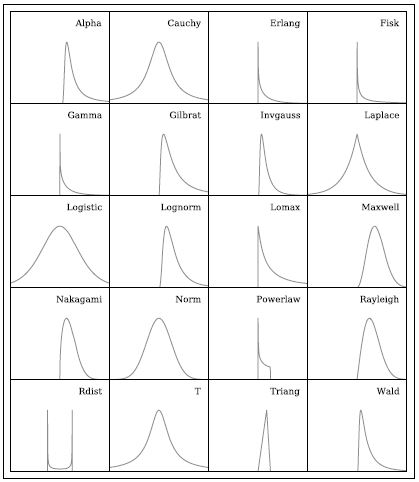

These distributions are useful as random number generators, similar to the functions
found in ``numpy.random``. Yet the rich variety of functions SciPy provides stands in contrast
to the ``numpy.random`` functions, which are limited to uniform and Gaussian-like distributions.

When we call a distribution from ``scipy.stats``, we can extract its information in several ways: 
- probability density functions (PDFs),
- cumulative distribution functions (CDFs),
- random variable samples (RVSs),
- percent point functions (PPFs), and more. 

So how do we set up SciPy to give us these distributions? Working with the classic normal function we demonstrate how to access the distribution.

In [ ]:
import numpy as np
from scipy.stats import norm

# Set up the sample range
x = np.linspace(-5,5,1000)

# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
dist = norm(loc=0, scale=1)

# Retrieving norm's PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Here we draw out 500 random values from the norm.
sample = dist.rvs(500)
sample[:30] #preview

array([-0.84686739,  0.31197264,  0.91045097,  0.22162299, -0.6097789 ,
        0.30686265, -1.48369643,  0.91260168, -0.10536693, -1.75167784,
       -0.99428109,  1.55591659,  0.39572227, -0.86447435,  0.24265868,
       -1.07579786,  0.63349518,  0.34741089,  1.00531985,  0.65048053,
       -0.57450935, -0.98993714, -0.87551768, -1.20483289, -1.10885572,
        1.26455758, -0.57240474, -0.13537575, -0.85373394, -0.39329954])

The distribution can be centered at a different point and scaled with the options loc and scale as shown in the example. This works as easily with all distributions because of their functional behavior, so it is important to read the documentation when necessary.

In other cases one will need a discrete distribution like the Poisson, binomial, or geometric. Unlike continuous distributions, discrete distributions are useful for problems where a given number of events occur in a fixed interval of time/space, the events occur with a known average rate, and each event is independent of the prior event.

The following equation is the probability mass function (PMF) of the geometric distribution.

$$PMF = (1 - p)^{(k - 1)} p $$

In [ ]:
import numpy as np
from scipy.stats import geom

# Here set up the parameters for the geometric distribution.
p = 0.5
dist = geom(p)

# Set up the sample range.
x = np.linspace(0, 5, 1000)

# Retrieving geom's PMF and CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)

# Here we draw out 500 random values.
sample = dist.rvs(500)
sample[:30] #preview

array([2, 5, 3, 3, 3, 6, 3, 1, 1, 1, 2, 1, 1, 6, 1, 2, 3, 2, 2, 5, 2, 1,
       2, 1, 1, 2, 1, 1, 4, 2])

## Functions

There are more than 60 statistical functions in SciPy, which can be overwhelming to digest if you simply are curious about what is available. The best way to think of the statistics functions is that they either describe or test samples—for example, the frequency of certain values or the Kolmogorov-Smirnov test, respectively.

Since SciPy provides a large range of distributions, it would be great to take advantage of the ones we covered earlier. In the stats package, there are a number of functions such as ``kstest`` and ``normaltest`` that test samples. These distribution tests can be very
helpful in determining whether a sample comes from some particular distribution or not. Before applying these, be sure you have a good understanding of your data, to
avoid misinterpreting the functions’ results.

In [ ]:
import numpy as np
from scipy import stats

# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)

# normaltest tests the null hypothesis.
out = stats.normaltest(sample)
print('normaltest output')
print('Z-score = ' + str(out[0]))
print('P-value = ' + str(out[1]))

# kstest is the Kolmogorov-Smirnov test for goodness of fit.
# Here its sample is being tested against the normal distribution.
# D is the KS statistic and the closer it is to 0 the better.
out = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))
# Similarly, this can be easily tested against other distributions,
# like the Wald distribution.
out = stats.kstest(sample, 'wald')
print('\nkstest output for the Wald distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))

normaltest output
Z-score = 2.7310973390582323
P-value = 0.255240594825485

kstest output for the Normal distribution
D = 0.0813540980508764
P-value = 0.5046775172440562

kstest output for the Wald distribution
D = 0.5946305403404677
P-value = 2.856588616070835e-34


Researchers commonly use descriptive functions for statistics. Some descriptive functions that are available in the ``stats`` package include the geometric mean (gmean), the skewness of a sample (skew), and the frequency of values in a sample (itemfreq). Using
these functions is simple and does not require much input. A few examples follow.

In [ ]:
import numpy as np
from scipy import stats

# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)

# The harmonic mean: Sample values have to
# be greater than 0.
out = stats.hmean(sample[sample > 0])
print('Harmonic mean = ' + str(out))

# The mean, where values below -1 and above 1 are
# removed for the mean calculation
out = stats.tmean(sample, limits=(-1, 1))
print('\nTrimmed mean = ' + str(out))

# Calculating the skewness of the sample
out = stats.skew(sample)
print('\nSkewness = ' + str(out))

# Additionally, there is a handy summary function called
# describe, which gives a quick look at the data.
out = stats.describe(sample)
print('\nSize = ' + str(out[0]))
print('Min = ' + str(out[1][0]))
print('Max = ' + str(out[1][1]))
print('Mean = ' + str(out[2]))
print('Variance = ' + str(out[3]))
print('Skewness = ' + str(out[4]))
print('Kurtosis = ' + str(out[5]))

Harmonic mean = 0.20942441963531436

Trimmed mean = -0.0053516990911391

Skewness = 0.01327086257149831

Size = 100
Min = -2.364331303744657
Max = 2.6722940424182355
Mean = -0.1808447714051496
Variance = 0.882599274619453
Skewness = 0.01327086257149831
Kurtosis = 0.0036102062780991595


There are many more functions available in the stats package, so the documentation is worth a look if you need more specific tools. If you need more statistical tools than are available here, try RPy. R is a cornerstone package for statistical analysis, and RPy
ports the tools available in that system to Python. If you’re content with what is available in SciPy and NumPy but need more automated analysis, then take a look at Pandas. It is a powerful package that can perform quick statistical analysis on big data. Its output is supplied in both numerical values and plots.

# Sources:


*   Numerical Python by Robert Johansson, ch. 13, 14, 16.
*   SciPy Programming Succinctly by James McCaffrey, ch. 4.
* SciPy & NumPy by Eli Bressert, ch. 3., section 4.

